# Project_FIFA_MoneyBall

The four main objectives of this projects are as following. The detailed explanation is stored in *README.MD*. 

1. Which countries are the origins of high valued players?
2. Which clubs have more high valued players?
3. When is the football players' career-peak in terms of their values?
4. What is the best linear regression to explain the players' values?

## 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 1. Importing the data

### 1-1. Importing the data

In [2]:
# importing data

df_original= pd.read_csv('Data/fifa21_male2.csv')

### 1-2. Getting overview of the data

In [3]:
df_original.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [5]:
df_original.describe().T

count           mean           std    min       25%  \
ID                17125.0  219388.716204  37499.197507    2.0  204082.0   
Age               17125.0      25.272934      4.942665   16.0      21.0   
OVA               17125.0      66.965022      6.864329   38.0      62.0   
BOV               17125.0      67.900204      6.637538   42.0      64.0   
POT               17125.0      72.489810      5.769949   47.0      69.0   
Growth            17125.0       5.524788      5.787539   -1.0       0.0   
Attacking         17125.0     258.537752     72.255687   33.0     232.0   
Crossing          17125.0      51.621314     17.875715    6.0      41.0   
Finishing         17125.0      47.956672     19.391547    3.0      33.0   
Heading Accuracy  17125.0      53.598832     16.947164    5.0      46.0   
Short Passing     17125.0      60.507620     13.960635    7.0      56.0   
Volleys           17067.0      45.005742     17.729483    4.0      32.0   
Skill             17125.0     266.607591     76.809344   43.0     232.0   
Dribbling         17125.0      57.846423     18.047250    5.0      53.0   
Curve             17067.0      49.574676     18.188344    4.0      37.0   
FK Accuracy       17125.0      44.387270     17.504128    5.0      32.0   
Long Passing      17125.0      54.324321     14.856911    9.0      45.0   
Ball Control      17125.0      60.642803     15.873647    5.0      57.0   
Movement          17125.0     322.693664     54.933593  113.0     294.0   
Acceleration      17125.0      65.445898     14.657889   12.0      58.0   
Sprint Speed      17125.0      65.443036     14.437377   11.0      59.0   
Agility           17067.0      64.602273     14.372443   14.0      57.0   
Reactions         17125.0      62.924847      9.037279   24.0      57.0   
Balance           17067.0      64.715591     14.031563   17.0      57.0   
Power             17125.0     302.414774     49.380576  128.0     272.0   
Shot Power        17125.0      59.711416     13.417931   12.0      50.0   
Jumping           17067.0      65.170212     11.918063   22.0      58.0   
Stamina           17125.0      63.309606     15.313272   11.0      56.0   
Strength          17125.0      65.308555     12.627212   16.0      58.0   
Long Shots        17125.0      49.135708     19.044862    4.0      35.0   
Mentality         17125.0     261.922803     62.913935   50.0     235.0   
Aggression        17125.0      56.997839     17.021619    9.0      45.0   
Interceptions     17118.0      47.085582     20.846705    4.0      26.0   
Positioning       17118.0      52.372766     19.094432    2.0      43.0   
Vision            17067.0      55.443605     13.730080   10.0      47.0   
Penalties         17125.0      50.251445     15.696363    7.0      40.0   
Composure         16702.0      59.940965     11.751111   12.0      53.0   
Defending         17125.0     141.469898     61.595180   17.0      84.0   
Marking           17125.0      47.246949     20.182548    3.0      29.0   
Standing Tackle   17125.0      48.279358     21.483597    5.0      28.0   
Sliding Tackle    17067.0      46.099725     21.185154    6.0      25.0   
Goalkeeping       17125.0      77.609693     81.136603    5.0      48.0   
GK Diving         17125.0      15.600467     16.828637    1.0       8.0   
GK Handling       17125.0      15.484672     16.143679    1.0       8.0   
GK Kicking        17125.0      15.472058     15.997328    1.0       8.0   
GK Positioning    17125.0      15.514277     16.406064    1.0       8.0   
GK Reflexes       17125.0      15.738628     17.130908    1.0       8.0   
Total Stats       17125.0    1631.256175    260.357024  731.0    1492.0   
Base Stats        17125.0     361.372146     40.252290  228.0     333.0   
PAC               17125.0      68.091620     11.147116   25.0      62.0   
SHO               17125.0      54.967299     13.877605   16.0      46.0   
PAS               17125.0      58.926540     10.186728   25.0      52.0   
DRI               17125.0      64.209869     

In [6]:
df_original.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    ID                int64  
 1    Name              object 
 2    Age               int64  
 3    OVA               int64  
 4    Nationality       object 
 5    Club              object 
 6    BOV               int64  
 7    BP                object 
 8    Position          object 
 9    Player Photo      object 
 10   Club Logo         object 
 11   Flag Photo        object 
 12   POT               int64  
 13   Team & Contract   object 
 14   Height            object 
 15   Weight            object 
 16   foot              object 
 17   Growth            int64  
 18   Joined            object 
 19   Loan Date End     object 
 20   Value             object 
 21   Wage              object 
 22   Release Clause    object 
 23   Contract          object 
 24   Attacking         int64  
 25   Crossing          in

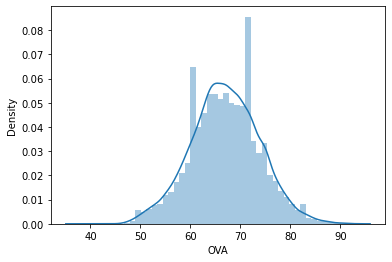

In [7]:
# distribution of some general variables

sns.distplot(df_original['OVA'])
plt.show()

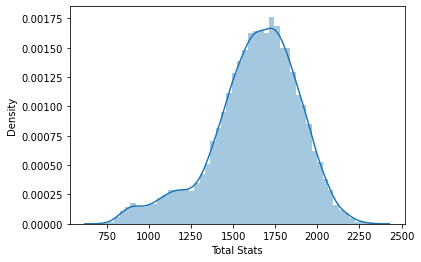

In [8]:
sns.distplot(df_original['Total Stats'])
plt.show()

## 2. Cleaning (columns names, objects to strings, null)
For cleaning the data, I will do first make certain strings to numbers. Those are;

the column # 14, 15, 18, 20 to 23, 67 to 71, 78 to 105

###  2-1. Changing the column names and setting 'ID' column as index

In [9]:
df_original.columns = [column.lower().replace(' ', '_') for column in df_original.columns]
df_original = df_original.set_index('id')

df = df_original.copy()
df.columns

Index(['name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp', 'position',
       'player_photo', 'club_logo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=106)

In [10]:
df.head()

name  age  ova            nationality           club  bov   bp  \
id                                                                          
2   G. Pasquale   33   69                  Italy        Udinese   71  LWB   
16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
27      J. Cole   33   71                England  Coventry City   71  CAM   
36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

        position                                       player_photo  \
id                                                                    
2             LM  https://cdn.sofifa.com/players/000/002/16_120.png   
16    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
27  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
36           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
41        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                           club_logo  \
id                                                     
2       https://cdn.sofifa.com/teams/55/light_60.png   
16    https://cdn.sofifa.com/teams/2013/light_60.png   
27    https://cdn.sofifa.com/teams/1800/light_60.png   
36     https://cdn.sofifa.com/teams/106/light_60.png   
41  https://cdn.sofifa.com/teams/101146/light_60.png   

                                 flag_photo  pot            team_&_contract  \
id                                                                            
2       https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
16      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
27  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
36      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
41      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

   height  weight   foot  growth        joined loan_date_end  value  wage  \
id                                                                          
2    6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
16  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
27   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
36  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
41   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

   release_clause     contract  attacking  crossing  finishing  \
id                                                               
2              €0  2008 ~ 2016        313        75         50   
16          €1.1M  2014 ~ 2019        337        68         64   
27             €0  2016 ~ 2020        337        80         64   
36             €0         2009        264        54         70   
41          €7.2M  2018 ~ 2021        367        75         69   

    heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
id                                                                      
2                 59             71     58.0    338         73   65.0   
16                61             76     68.0    369         69   79.0   
27                41             77     75.0    387         79   84.0   
36                60             80      NaN    255         68    NaN   
41                54             90     79.0    408         85   80.0   

    fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                    
2            60            69            71       347            68   
16           79            71            71       305            56   
27           77            69            78       295            48   
36           46            64            77       176            59   
41           70            83            90       346            61   

    sprint_sp

###  2-2. Changing 'height' unit from feet/inches to centimeter

In [11]:
df['height'].isna().sum()

0

In [12]:
# first, eliminate double quotation from each value, then split feet and inches by single quotation
# apply lamdba to calculate the heights into centimeters

df['height'] = df_original['height'].str.strip('"')
df['height'] = df['height'].apply(lambda h: int(h.split("'")[0])*30.48 + int(h.split("'")[1])*2.54)
df['height'].head()

id
2     182.88
16    177.80
27    175.26
36    180.34
41    170.18
Name: height, dtype: float64

###  2-3. Changing 'weight' unit from pounds to kilograms

In [13]:
df['weight'].isna().sum()

0

In [14]:
df['weight'] = df_original['weight'].str.strip('lbs')
df['weight'] = df['weight'].apply(lambda w: round(int(w) * 0.45359237,2))

df['weight'].head()

id
2     82.10
16    64.86
27    73.03
36    74.84
41    68.04
Name: weight, dtype: float64

###  2-4. Changing 'joined' column type from object into date 

In [15]:
df['joined'].head()

id
2      Jul 1, 2008
16    Jul 19, 2014
27     Jan 7, 2016
36             NaN
41    Jul 16, 2018
Name: joined, dtype: object

In [16]:
df['joined'].isna().sum()

58

In [17]:
df['joined'] = pd.to_datetime(df['joined'])
df['joined'].head()

id
2    2008-07-01
16   2014-07-19
27   2016-01-07
36          NaT
41   2018-07-16
Name: joined, dtype: datetime64[ns]

In [18]:
# changeing 'loan_date_end' too

df['loan_date_end'] = pd.to_datetime(df['loan_date_end'])
df['loan_date_end'].head()

id
2    NaT
16   NaT
27   NaT
36   NaT
41   NaT
Name: loan_date_end, dtype: datetime64[ns]

###  2-5. Changing data type of 'value' and 'wage' from object to string

In [19]:
df['value'].isna().sum(), df['wage'].isna().sum()

(0, 0)

In [20]:
df[['value', 'wage']].head()

value  wage
id             
2   €625K   €7K
16  €600K   €7K
27  €1.1M  €15K
36     €0    €0
41  €5.5M  €12K

In [21]:
df['value'] = df_original['value'].str.strip('€')
df['wage'] = df_original['wage'].str.strip('€')
df['release_clause'] = df_original['release_clause'].str.strip('€')

In [22]:
# I copied the code from google

df['value'] = (df['value'].replace(r'[KMB]', '', regex=True).astype(float) *
          df['value'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1)
          .replace(['K','M','B'], [1, 10**3, 10**6]).astype(float))

In [23]:
df['wage'] = (df['wage'].replace(r'[KMB]', '', regex=True).astype(float) *
          df['wage'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1)
          .replace(['K','M','B'], [1, 10**3, 10**6]).astype(float))

In [24]:
df['release_clause'] = (df['release_clause'].replace(r'[KMB]', '', regex=True).astype(float) *
          df['release_clause'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1)
          .replace(['K','M','B'], [1, 10**3, 10**6]).astype(float))

In [25]:
df[['value', 'wage', 'release_clause']].head()

value  wage  release_clause
id                              
2    625.0   7.0             0.0
16   600.0   7.0          1100.0
27  1100.0  15.0             0.0
36     0.0   0.0             0.0
41  5500.0  12.0          7200.0

In [26]:
df.sort_values(['value'], ascending=False).head(100)

name  age  ova         nationality  \
id                                                          
231747            K. Mbappé   21   90              France   
190871            Neymar Jr   28   91              Brazil   
192985         K. De Bruyne   29   91             Belgium   
188545       R. Lewandowski   31   91              Poland   
208722              S. Mané   28   90             Senegal   
209331             M. Salah   28   90               Egypt   
203376          V. van Dijk   28   90         Netherlands   
200389             J. Oblak   27   91            Slovenia   
202652          R. Sterling   25   88             England   
202126              H. Kane   26   88             England   
211110            P. Dybala   26   88           Argentina   
192448        M. ter Stegen   28   90             Germany   
233049            J. Sancho   20   87             England   
158023             L. Messi   33   93           Argentina   
212622           J. Kimmich   25   88             Germany   
212198      Bruno Fernandes   25   87            Portugal   
212831              Alisson   27   90              Brazil   
218667       Bernardo Silva   25   87            Portugal   
231281  T. Alexander-Arnold   21   87             England   
200145             Casemiro   28   89              Brazil   
183277            E. Hazard   29   88             Belgium   
235790           K. Havertz   21   85             Germany   
212218           A. Laporte   26   87              France   
192119          T. Courtois   28   89             Belgium   
182521             T. Kroos   30   88             Germany   
209499              Fabinho   26   87              Brazil   
210257              Ederson   26   88              Brazil   
231677          M. Rashford   22   85             England   
216267         A. Robertson   26   87            Scotland   
165153           K. Benzema   32   89              France   
153079            S. Agüero   32   89           Argentina   
200104               H. Son   27   87      Korea Republic   
201942      Roberto Firmino   28   87              Brazil   
222492              L. Sané   24   85             Germany   
215914             N. Kanté   29   88              France   
194765         A. Griezmann   29   87              France   
228702           F. de Jong   23   85         Netherlands   
195864             P. Pogba   27   86              France   
201024         K. Koulibaly   29   88             Senegal   
199556          M. Verratti   27   86               Italy   
235243           M. de Ligt   20   85         Netherlands   
212188            T. Werner   24   85             Germany   
223848  S. Milinković-Savić   25   85              Serbia   
192387          C. Immobile   30   87               Italy   
202556             M. Depay   26   85         Netherlands   
206113            S. Gnabry   24   85             Germany   
201535            R. Varane   27   86              France   
20801     Cristiano Ronaldo   35   92            Portugal   
188567        P. Aubameyang   31   87               Gabon   
192505            R. Lukaku   27   85             Belgium   
239085           E. Haaland   19   84              Norway   
201399            M. Icardi   27   85           Argentina   
232363          M. Škriniar   25   85            Slovakia   
231478          L. Martínez   22   84           Argentina   
220440           C. Lenglet   25   85              France   
208670            H. Ziyech   27   85             Morocco   
207865           Marquinhos   26   85              Brazil   
231866                Rodri   24   85               Spain   
230142            Oyarzabal   23   84               Spain   
189596            T. Müller   30   86             Germany   
230621        G. Donnarumma   21   85               Italy   
211300           A. Martial   24   84              France   
230658               Arthur   23   84              Brazil   
210243      Ricardo Pereira   26   85            Portugal 

###  2-6. Chainging 'W/F', 'SM', 'IR' from object to string


In [27]:
df[['w/f', 'sm','ir']].head()

# there is space before star in 'w/f' and ir column

w/f  sm   ir
id              
2   3 ★  2★  2 ★
16  4 ★  3★  1 ★
27  4 ★  4★  2 ★
36  3 ★  1★  1 ★
41  4 ★  4★  4 ★

In [28]:
df['w/f'] = df_original['w/f'].str.strip('★').astype(int)
df['sm'] = df_original['sm'].str.strip('★').astype(int)
df['ir'] = df_original['ir'].str.strip('★').astype(int)

In [29]:
df[['w/f', 'sm','ir']].head()

w/f  sm  ir
id             
2     3   2   2
16    4   3   1
27    4   4   2
36    3   1   1
41    4   4   4

In [30]:
df['w/f'].unique()

array([3, 4, 2, 1, 5])

###  2-7. Changing 'a/w' and 'd/w' into scales
High=3, Medium=2, Low=1, NaN=0

In [31]:
df[['a/w', 'd/w']].head()

a/w     d/w
id                
2   Medium    High
16  Medium  Medium
27  Medium     Low
36     NaN     NaN
41    High  Medium

In [32]:
df['d/w'].unique()

array(['High', 'Medium', 'Low', nan], dtype=object)

In [33]:
df['a/w'] = df_original['a/w'].replace('High', '3').replace('Medium', '2').replace('Low', '1').fillna('0').astype(int)
df['d/w'] = df_original['d/w'].replace('High', '3').replace('Medium', '2').replace('Low', '1').fillna('0').astype(int)

df[['a/w', 'd/w']].head()

a/w  d/w
id          
2     2    3
16    2    2
27    2    1
36    0    0
41    3    2

###  2-8. Changing 'hits' from object to string

In [34]:
df['hits'] = (df_original['hits'].replace(r'[KM]', '', regex=True).astype(float) *
          df_original['hits'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(float))

In [35]:
df.hits.astype(int).head()

id
2       4
16      4
27     11
36      3
41    149
Name: hits, dtype: int64

###  2-9. Changing columns 'ls' to 'gk' from object to string

In [36]:
# I decided to add up the extra number aside the main value of each columns from ls to gk. 

df.ls.head()

id
2     65+0
16    67+1
27    64+0
36    67+0
41    72+3
Name: ls, dtype: object

In [37]:
cols = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
       'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
       'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

In [38]:
for i in df_original[cols]:
    df[i] = df_original[i].apply(lambda x: int(x.split('+')[0]) + int(x.split('+')[1]))

In [39]:
df.head()

name  age  ova            nationality           club  bov   bp  \
id                                                                          
2   G. Pasquale   33   69                  Italy        Udinese   71  LWB   
16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
27      J. Cole   33   71                England  Coventry City   71  CAM   
36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

        position                                       player_photo  \
id                                                                    
2             LM  https://cdn.sofifa.com/players/000/002/16_120.png   
16    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
27  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
36           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
41        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                           club_logo  \
id                                                     
2       https://cdn.sofifa.com/teams/55/light_60.png   
16    https://cdn.sofifa.com/teams/2013/light_60.png   
27    https://cdn.sofifa.com/teams/1800/light_60.png   
36     https://cdn.sofifa.com/teams/106/light_60.png   
41  https://cdn.sofifa.com/teams/101146/light_60.png   

                                 flag_photo  pot            team_&_contract  \
id                                                                            
2       https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
16      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
27  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
36      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
41      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

    height  weight   foot  growth     joined loan_date_end   value  wage  \
id                                                                         
2   182.88   82.10   Left       0 2008-07-01           NaT   625.0   7.0   
16  177.80   64.86  Right       0 2014-07-19           NaT   600.0   7.0   
27  175.26   73.03  Right       0 2016-01-07           NaT  1100.0  15.0   
36  180.34   74.84  Right      14        NaT           NaT     0.0   0.0   
41  170.18   68.04  Right       0 2018-07-16           NaT  5500.0  12.0   

    release_clause     contract  attacking  crossing  finishing  \
id                                                                
2              0.0  2008 ~ 2016        313        75         50   
16          1100.0  2014 ~ 2019        337        68         64   
27             0.0  2016 ~ 2020        337        80         64   
36             0.0         2009        264        54         70   
41          7200.0  2018 ~ 2021        367        75         69   

    heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
id                                                                      
2                 59             71     58.0    338         73   65.0   
16                61             76     68.0    369         69   79.0   
27                41             77     75.0    387         79   84.0   
36                60             80      NaN    255         68    NaN   
41                54             90     79.0    408         85   80.0   

    fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                    
2            60            69            71       347            68   
16           79            71            71       305            56   
27           77            69            78       295            48   
36           46            64            77       176            59   
41           70            83            90       346            61   

    sprint_sp

### 2-10. Handling null values

In [40]:
df.isna().sum()

name                    0
age                     0
ova                     0
nationality             0
club                   23
bov                     0
bp                      0
position              413
player_photo            0
club_logo              23
flag_photo              0
pot                     0
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 58
loan_date_end       16215
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                58
skill                   0
dribbling               0
curve                  58
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility     

In [41]:
# Drop the players who are null in joined column, because they might be already retired.

df = df.dropna(subset=['joined'])

In [42]:
# For composure, I will replace null by each player's overall ability score. 

df['composure'].describe()

count    16702.000000
mean        59.940965
std         11.751111
min         12.000000
25%         53.000000
50%         61.000000
75%         68.000000
max         96.000000
Name: composure, dtype: float64

In [43]:
df["composure"].fillna(df["ova"], inplace=True)

In [44]:
df["club"].fillna('Other', inplace=True)

In [45]:
df.isna().sum()

name                    0
age                     0
ova                     0
nationality             0
club                    0
bov                     0
bp                      0
position              393
player_photo            0
club_logo              18
flag_photo              0
pot                     0
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                  0
loan_date_end       16157
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
skill                   0
dribbling               0
curve                   0
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility     

### 2-11. Dermine whether the player is active or retired

In [46]:
# In the dataset, there are players like David Beckham or Michael Owen, who already retired years ago. 
# So, I decided to remove all those retird players.
# I will derminte it by contract year. If the contract ended before 2020, I put the person as retired. 

df.contract.value_counts()

2019 ~ 2021                                    1348
2018 ~ 2021                                    1077
2019 ~ 2022                                    1069
2020 ~ 2022                                    1019
2019 ~ 2023                                     912
2020 ~ 2021                                     895
2020 ~ 2023                                     833
2020 ~ 2024                                     630
2018 ~ 2022                                     618
2017 ~ 2021                                     615
Jun 30, 2021 On Loan                            554
2019 ~ 2024                                     506
2018 ~ 2023                                     448
2019 ~ 2020                                     417
2017 ~ 2022                                     403
2018 ~ 2020                                     350
2016 ~ 2021                                     345
Free                                            307
2020 ~ 2020                                     274
2017 ~ 2020 

In [47]:
# Extract only final year of contract.

df['contract'] = df_original['contract'].str.replace('On Loan', '').str.strip().str[-4:].str.replace(
    'Free', '1000').astype(int)

In [48]:
df.contract.value_counts()

2021    5479
2022    3711
2023    2812
2020    1912
2024    1580
2025     433
1000     332
2019     288
2018     147
2017      99
2016      83
2015      62
2014      48
2013      29
2012      26
2011      20
2026       4
2027       1
2028       1
Name: contract, dtype: int64

In [49]:
df['active'] = [True if x >= 2020 else False for x in df['contract']]

In [50]:
df['active'].value_counts()

True     15933
False     1134
Name: active, dtype: int64

In [51]:
df[df['active'] == False].head()

name  age  ova nationality               club  bov   bp  \
id                                                                      
2      G. Pasquale   33   69       Italy            Udinese   71  LWB   
16     Luis García   37   71       Spain          KAS Eupen   70   CM   
61      D. Odonkor   27   66     Germany   Alemannia Aachen   66   RW   
241       R. Giggs   39   78       Wales  Manchester United   78  CAM   
244  G. Neville  B   35   76     England  Manchester United   78   CB   

       position                                       player_photo  \
id                                                                   
2            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
16   CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
61        RW RM  https://cdn.sofifa.com/players/000/061/12_120.png   
241   LM CM CAM  https://cdn.sofifa.com/players/000/241/14_120.png   
244   RB CB RWB  https://cdn.sofifa.com/players/000/244/11_120.png   

                                          club_logo  \
id                                                    
2      https://cdn.sofifa.com/teams/55/light_60.png   
16   https://cdn.sofifa.com/teams/2013/light_60.png   
61   https://cdn.sofifa.com/teams/1826/light_60.png   
241    https://cdn.sofifa.com/teams/11/light_60.png   
244    https://cdn.sofifa.com/teams/11/light_60.png   

                                  flag_photo  pot  \
id                                                  
2        https://cdn.sofifa.com/flags/it.png   69   
16       https://cdn.sofifa.com/flags/es.png   71   
61       https://cdn.sofifa.com/flags/de.png   70   
241  https://cdn.sofifa.com/flags/gb-wls.png   78   
244  https://cdn.sofifa.com/flags/gb-eng.png   82   

                   team_&_contract  height  weight   foot  growth     joined  \
id                                                                             
2              Udinese 2008 ~ 2016  182.88   82.10   Left       0 2008-07-01   
16           KAS Eupen 2014 ~ 2019  177.80   64.86  Right       0 2014-07-19   
61    Alemannia Aachen 2011 ~ 2012  172.72   73.94  Right       4 2011-01-01   
241  Manchester United 1990 ~ 2014  177.80   71.21   Left       0 1990-12-01   
244  Manchester United 1991 ~ 2011  177.80   78.93  Right       6 1991-01-01   

    loan_date_end  value  wage  release_clause  contract  attacking  crossing  \
id                                                                              
2             NaT  625.0   7.0             0.0      2016        313        75   
16            NaT  600.0   7.0          1100.0      2019        337        68   
61            NaT  725.0   5.0             0.0      2012        271        61   
241           NaT    1.0  60.0             0.0      2014        380        90   
244           NaT    0.0   0.0             0.0      2011        304        72   

     finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
id                                                                           
2           50                59             71     58.0    338         73   
16          64                61             76     68.0    369         69   
61          53                42             58     57.0    276         67   
241         70                60             85     75.0    402         77   
244         31                75             71     55.0    258         44   

     curve  fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                            
2     65.0           60            69            71       347            68   
16    79.0           79            71            71       305            56   
61    61.0           42            44            62       406            90   
241   87.0           78            81            79       337            59   
244   56.0           33            61            64       324            64   

     sprint_speed  agil

In [52]:
# Dataframe 'df_a' is the only players who are active.

df_a = df[df['active'] == True]

## 3. EDA

### 3-1. Checking distributions

In [53]:
df_a.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15933 entries, 27 to 259105
Data columns (total 107 columns):
 #    Column            Dtype         
---   ------            -----         
 0    name              object        
 1    age               int64         
 2    ova               int64         
 3    nationality       object        
 4    club              object        
 5    bov               int64         
 6    bp                object        
 7    position          object        
 8    player_photo      object        
 9    club_logo         object        
 10   flag_photo        object        
 11   pot               int64         
 12   team_&_contract   object        
 13   height            float64       
 14   weight            float64       
 15   foot              object        
 16   growth            int64         
 17   joined            datetime64[ns]
 18   loan_date_end     datetime64[ns]
 19   value             float64       
 20   wage              float6

In [54]:
df_a.describe().T

count         mean           std      min      25%  \
age               15933.0    24.984121      4.776797    16.00    21.00   
ova               15933.0    66.809640      6.852924    45.00    62.00   
bov               15933.0    67.806188      6.635281    44.00    64.00   
pot               15933.0    72.553317      5.735191    47.00    69.00   
height            15933.0   181.234651      6.881373   154.94   175.26   
weight            15933.0    75.062934      7.131600    49.90    69.85   
growth            15933.0     5.743677      5.827254     0.00     0.00   
value             15933.0  2678.065399   5513.833846     0.00   400.00   
wage              15933.0   113.081780    229.310081     1.00     3.00   
release_clause    15933.0  4842.164376  10619.729572     0.00   606.00   
contract          15933.0  2021.874161      1.278177  2020.00  2021.00   
attacking         15933.0   257.530660     71.956863    42.00   231.00   
crossing          15933.0    51.385113     17.817598     6.00    40.00   
finishing         15933.0    47.758740     19.385660     3.00    32.00   
heading_accuracy  15933.0    53.375259     16.856819     5.00    45.00   
short_passing     15933.0    60.351911     13.912291     7.00    56.00   
volleys           15933.0    44.659637     17.589831     4.00    32.00   
skill             15933.0   265.571895     76.477690    43.00   231.00   
dribbling         15933.0    57.759995     18.029316     5.00    53.00   
curve             15933.0    49.281742     18.070371     4.00    37.00   
fk_accuracy       15933.0    43.951673     17.306752     5.00    32.00   
long_passing      15933.0    54.092261     14.824728     9.00    45.00   
ball_control      15933.0    60.486224     15.820298     5.00    57.00   
movement          15933.0   323.397602     54.478225   113.00   295.00   
acceleration      15933.0    65.622482     14.586940    12.00    59.00   
sprint_speed      15933.0    65.627440     14.370786    11.00    59.00   
agility           15933.0    64.685935     14.329342    14.00    57.00   
reactions         15933.0    62.721772      9.020987    24.00    57.00   
balance           15933.0    64.739974     14.004858    17.00    57.00   
power             15933.0   302.228017     49.261886   128.00   271.00   
shot_power        15933.0    59.530973     13.193299    12.00    50.00   
jumping           15933.0    65.167012     11.902990    22.00    58.00   
stamina           15933.0    63.491558     15.276969    11.00    56.00   
strength          15933.0    65.212766     12.577020    16.00    58.00   
long_shots        15933.0    48.825708     18.990340     4.00    35.00   
mentality         15933.0   260.920291     62.611986    50.00   234.00   
aggression        15933.0    56.754284     16.971086     9.00    45.00   
interceptions     15933.0    46.898889     20.796511     4.00    26.00   
positioning       15933.0    52.186217     19.048932     2.00    43.00   
vision            15933.0    55.266554     13.636983    10.00    46.00   
penalties         15933.0    49.814348     15.482638     7.00    40.00   
composure         15933.0    59.767087     11.712185    12.00    53.00   
defending         15933.0   141.670370     61.295095    20.00    85.00   
marking           15933.0    47.294609     20.035271     3.00    30.00   
standing_tackle   15933.0    48.273709     21.405693     5.00    28.00   
sliding_tackle    15933.0    46.102052     21.105218     6.00    25.00   
goalkeeping       15933.0    77.429172     80.919387     5.00    48.00   
gk_diving         15933.0    15.583945     16.785085     1.00     8.00   
gk_handling       15933.0    15.425846     16.065402     1.00     8.00   
gk_kicking        15933.0    15.294295     15.754445     1.00     8.00   
gk_positioning    15933.0    15.441411     16.309254     1.00     8.00   
gk_reflexes       15933.0    15.683675     17.097639     1.00     8.00   
total_stats       15933.0  1628.748007    260.153091   731.00  1490.00   
base_stats        15933.

In [55]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15933 entries, 27 to 259105
Columns: 107 entries, name to active
dtypes: bool(1), datetime64[ns](2), float64(16), int64(77), object(11)
memory usage: 13.0+ MB


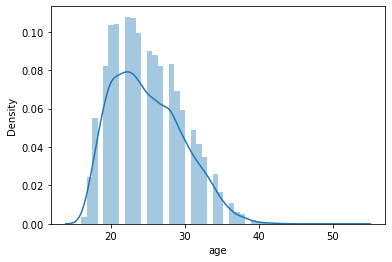

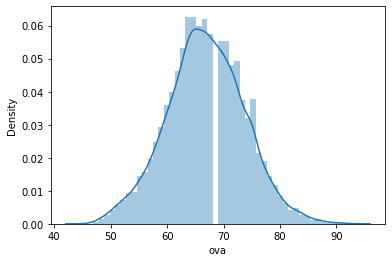

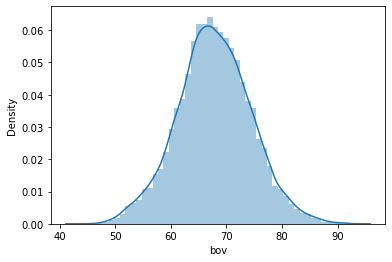

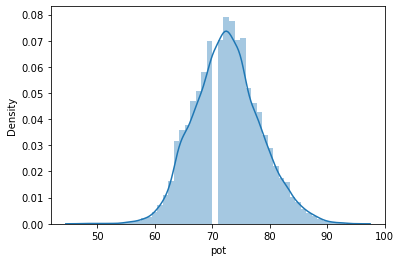

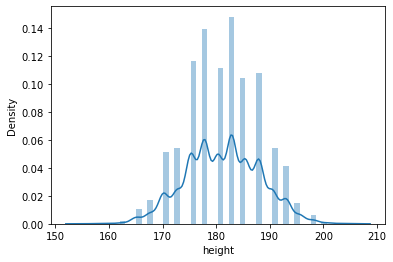

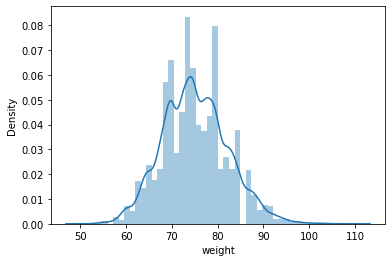

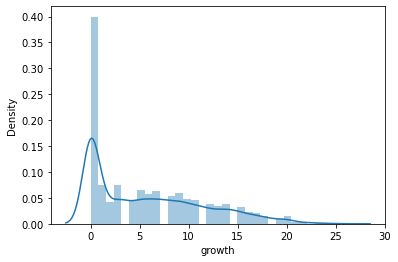

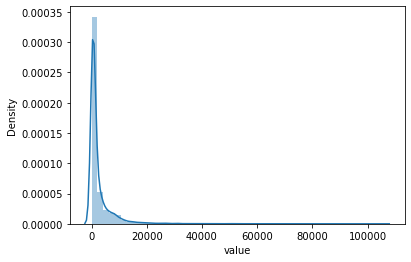

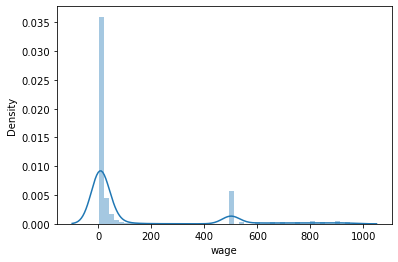

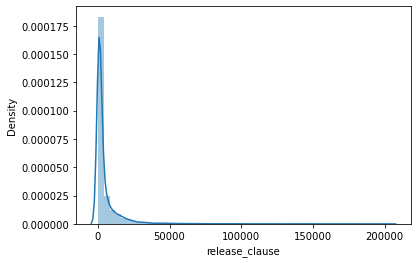

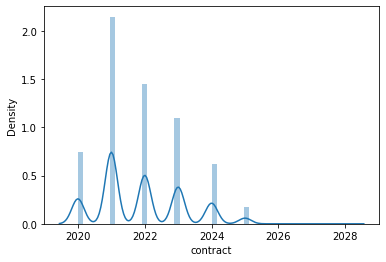

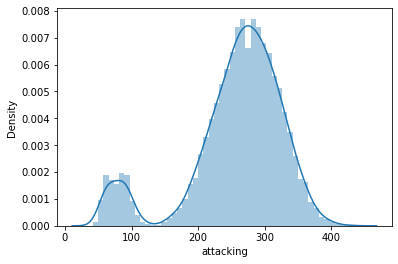

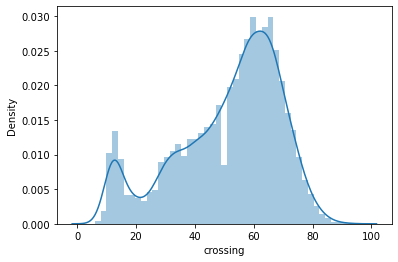

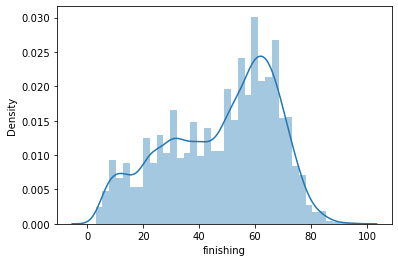

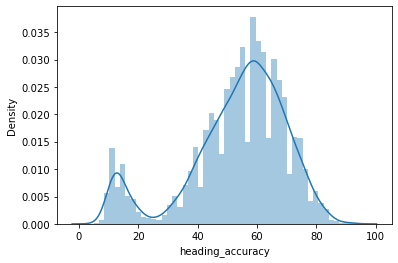

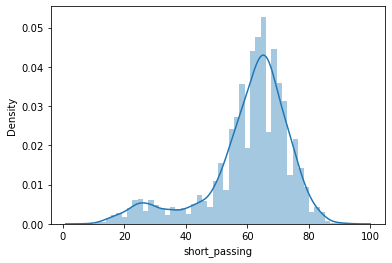

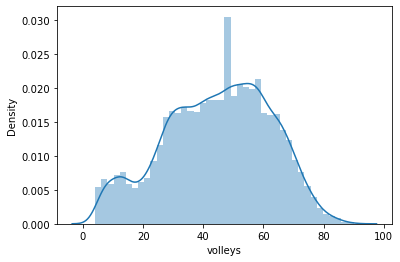

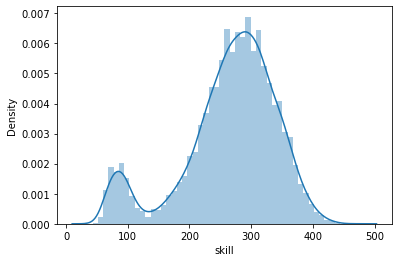

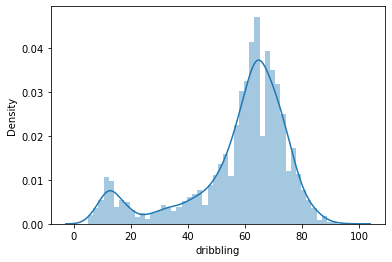

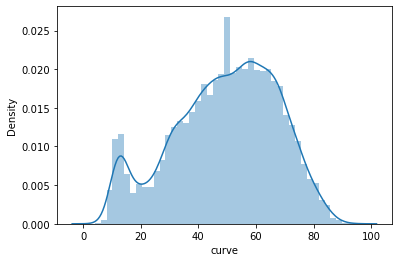

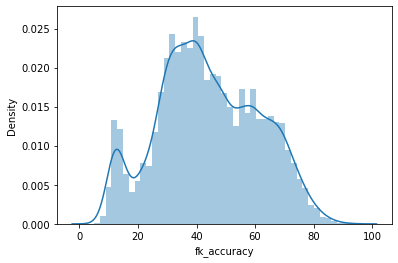

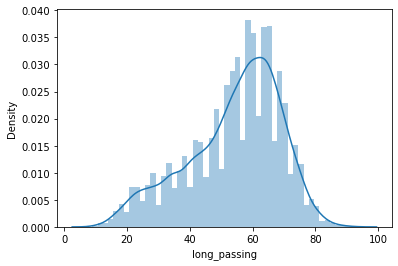

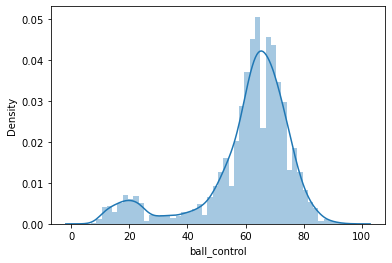

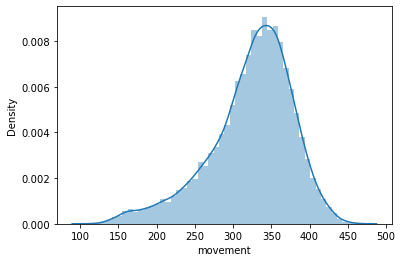

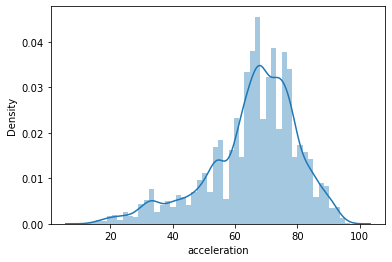

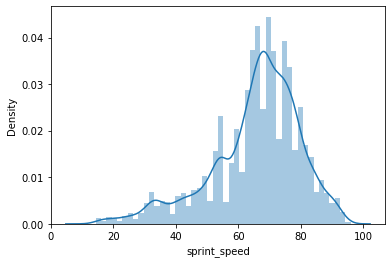

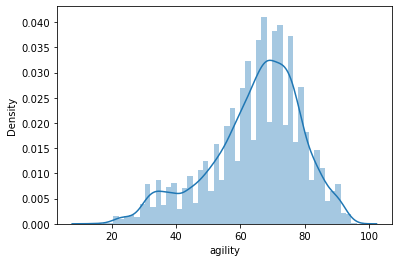

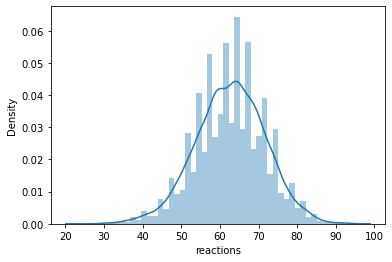

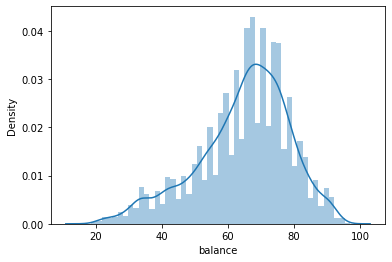

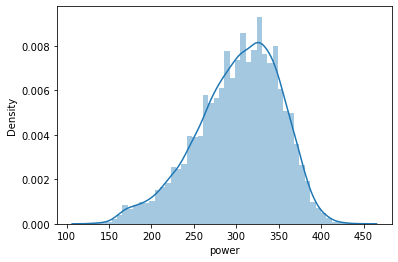

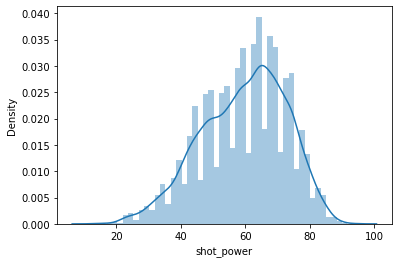

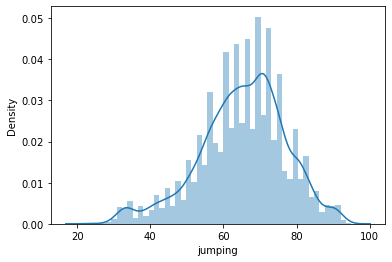

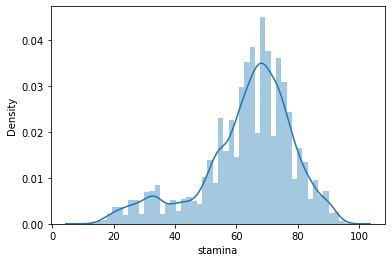

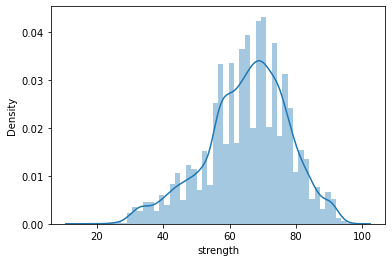

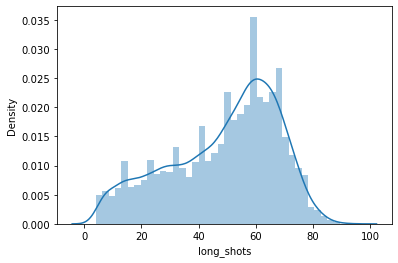

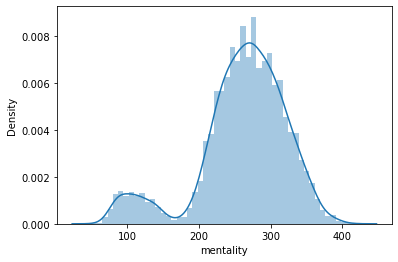

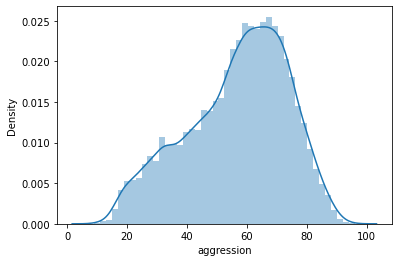

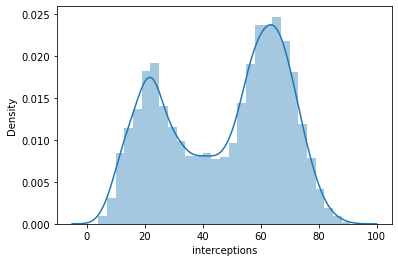

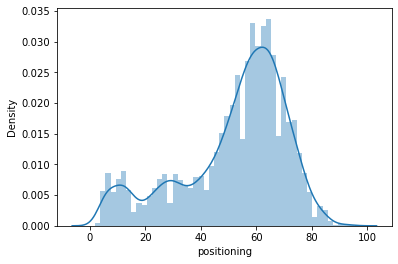

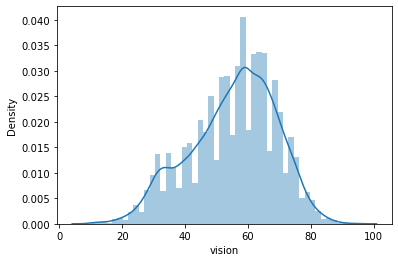

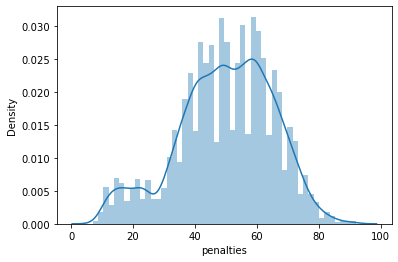

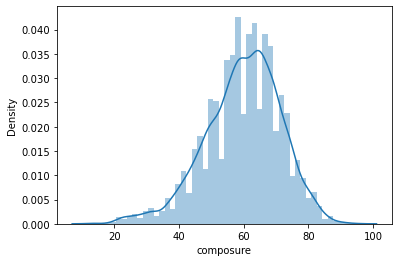

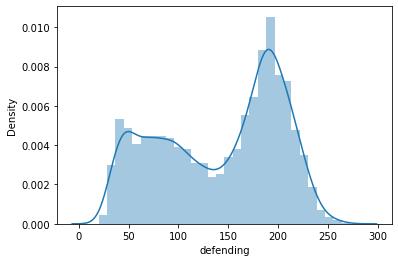

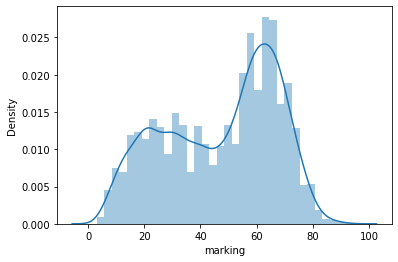

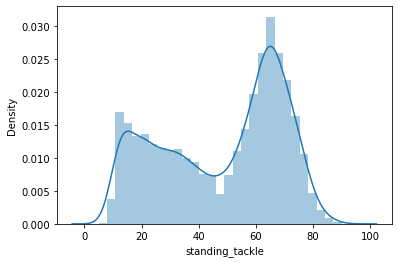

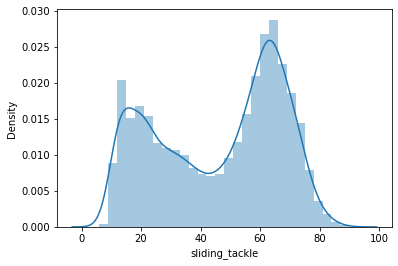

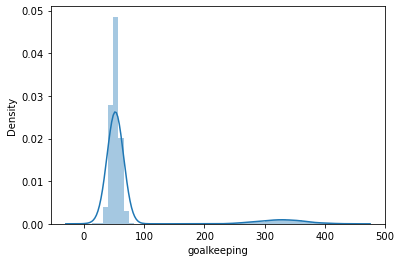

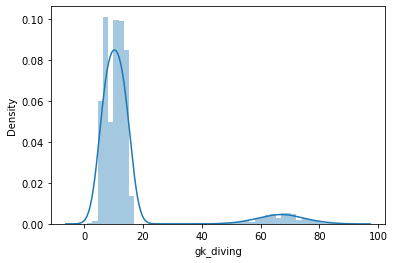

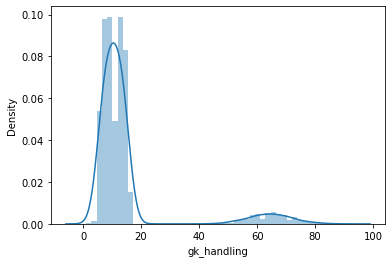

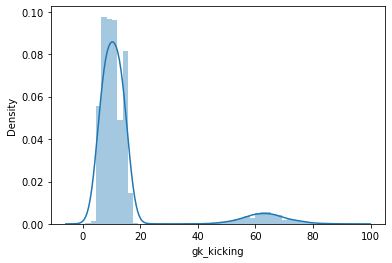

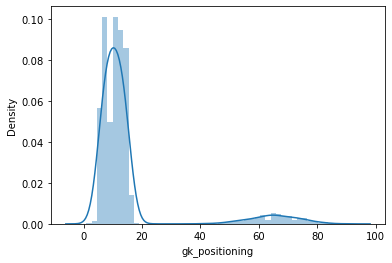

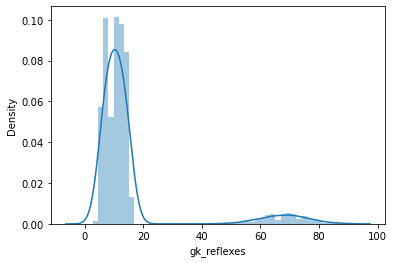

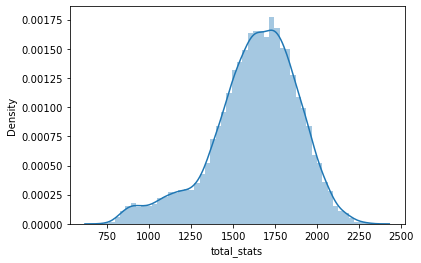

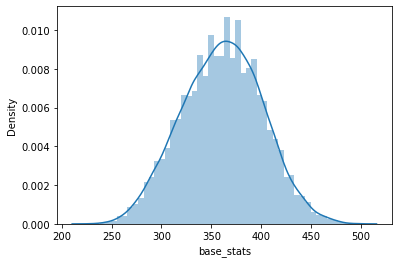

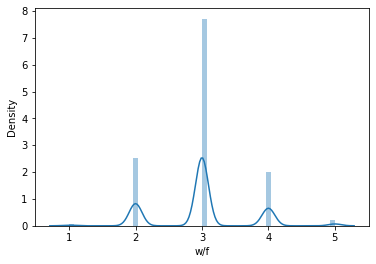

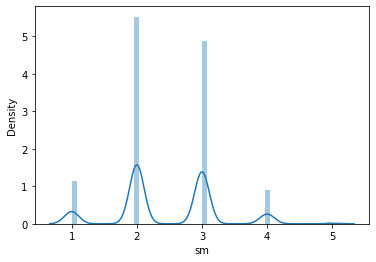

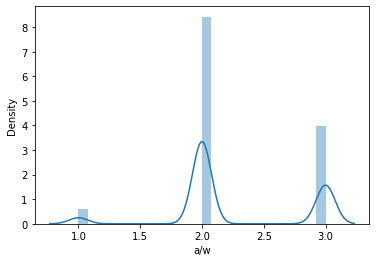

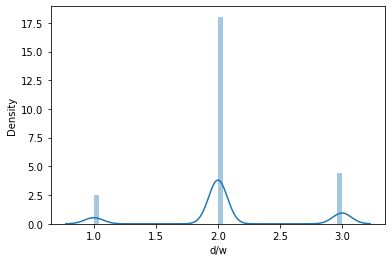

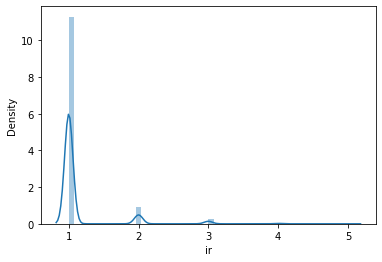

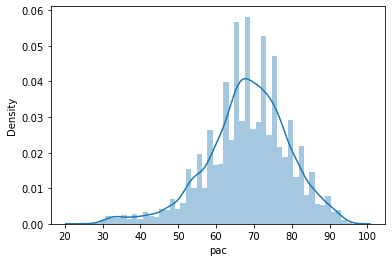

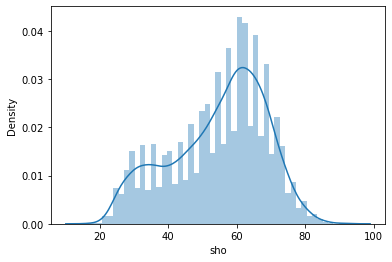

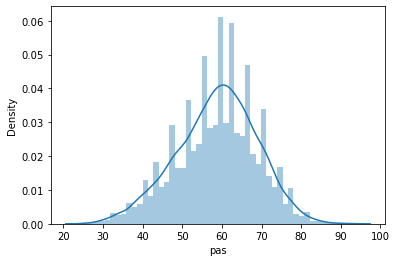

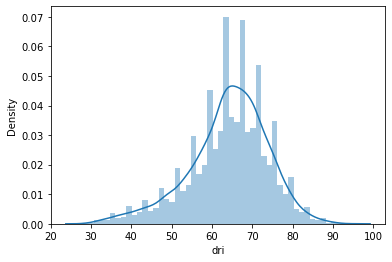

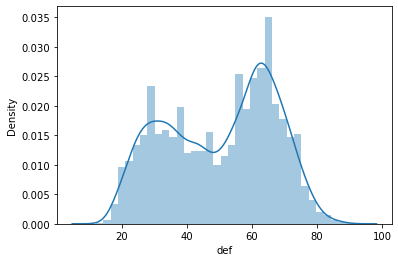

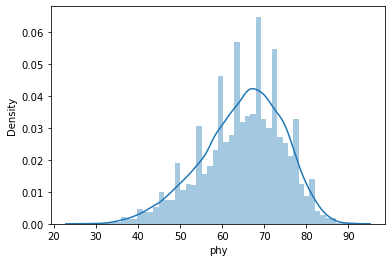

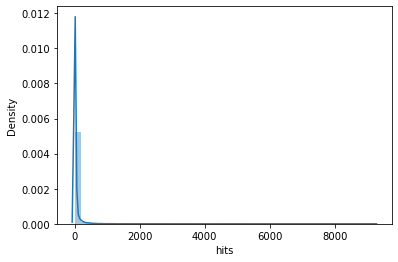

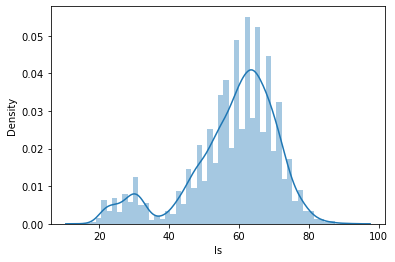

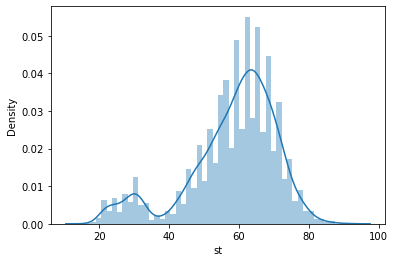

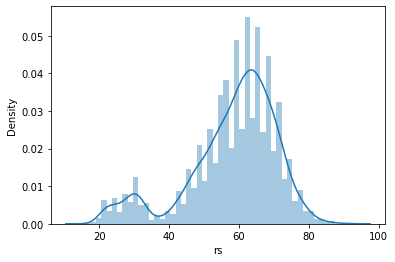

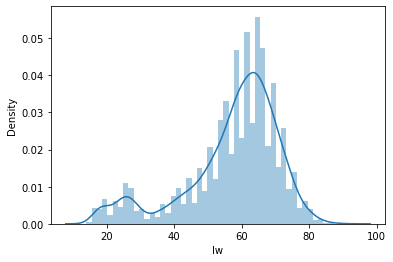

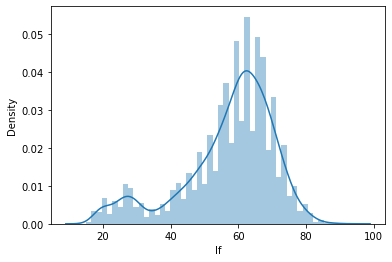

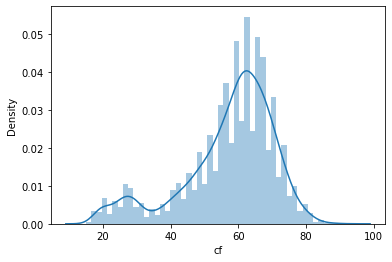

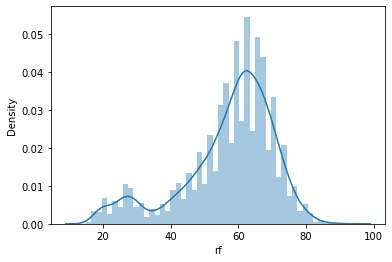

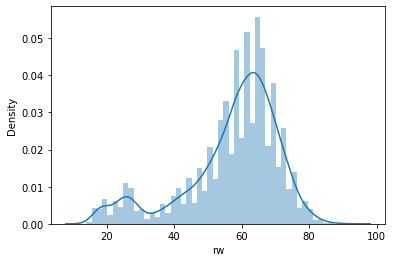

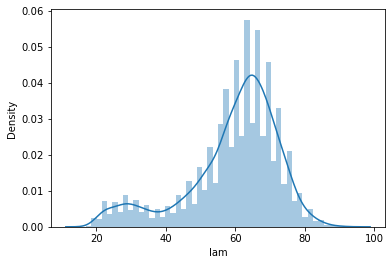

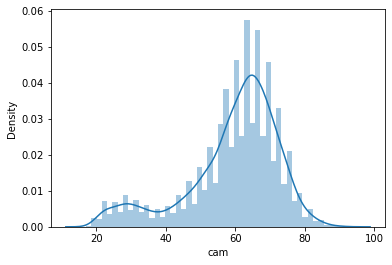

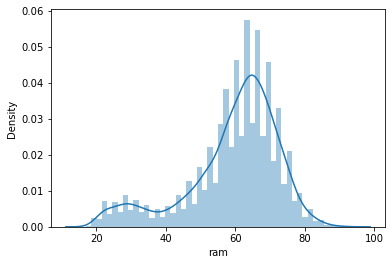

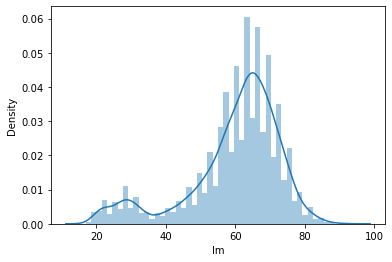

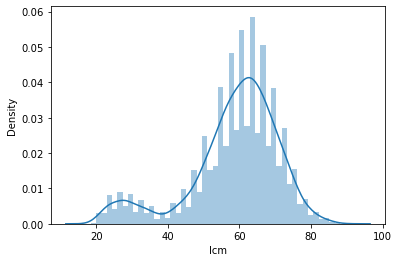

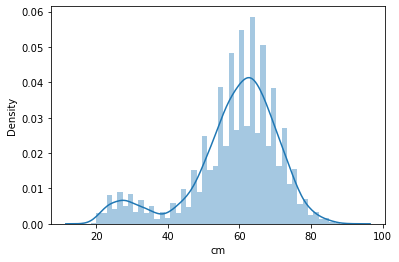

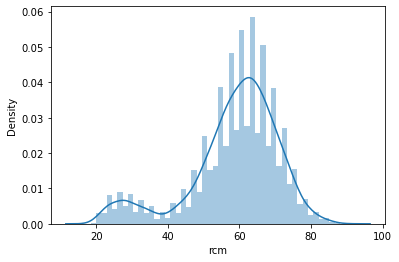

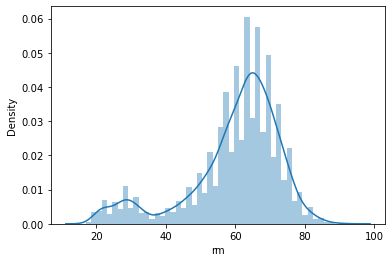

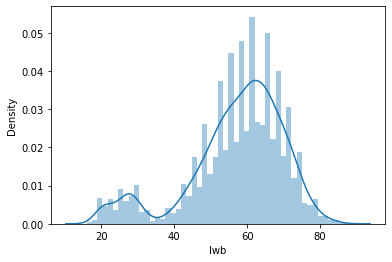

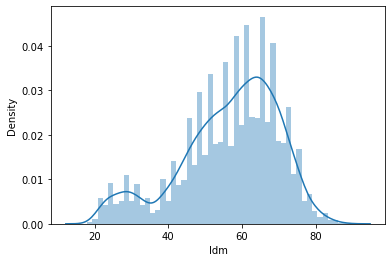

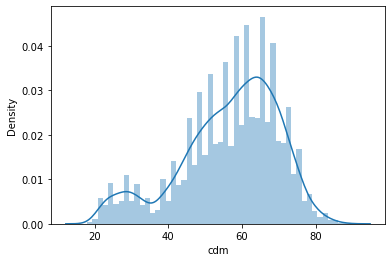

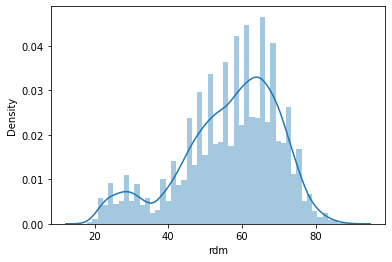

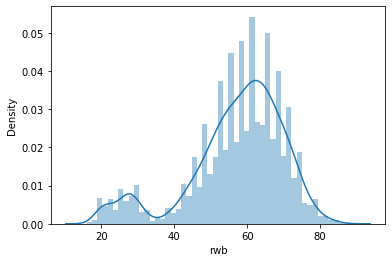

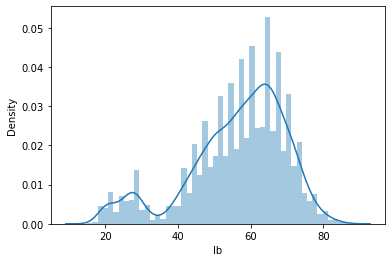

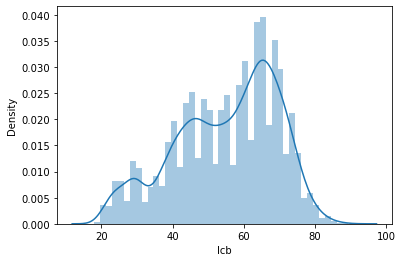

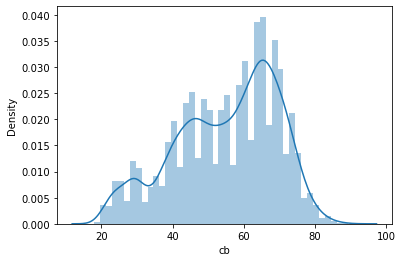

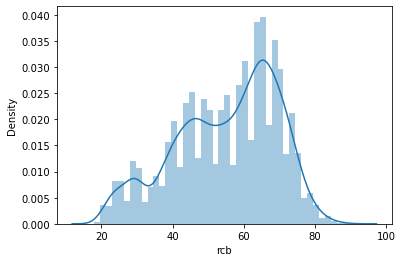

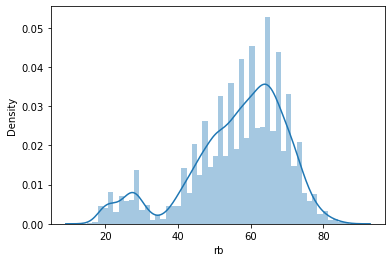

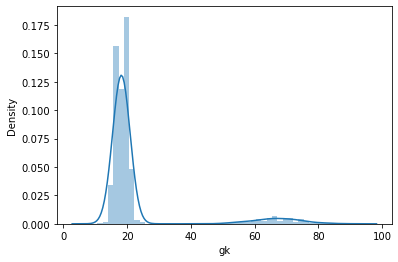

In [56]:
for column in df_a.select_dtypes(np.number).columns:
    sns.distplot(df_a[column])
    plt.show()

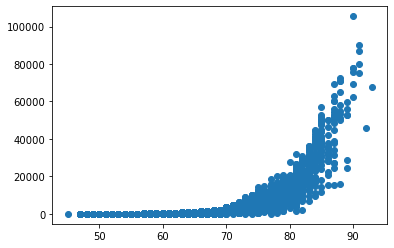

In [57]:
plt.scatter(df_a['ova'], df_a['value'])
plt.show()

In [58]:
# checking distribution without Goalkeepers since their abilities are totallly diffrent from the outfield players.

df_f = df_a[df_a['bp'] != 'GK']
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14469 entries, 27 to 259105
Columns: 107 entries, name to active
dtypes: bool(1), datetime64[ns](2), float64(16), int64(77), object(11)
memory usage: 11.8+ MB


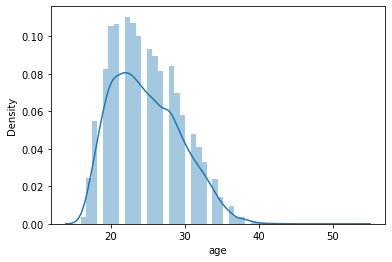

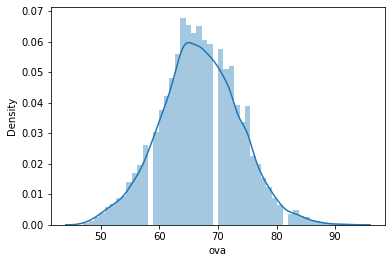

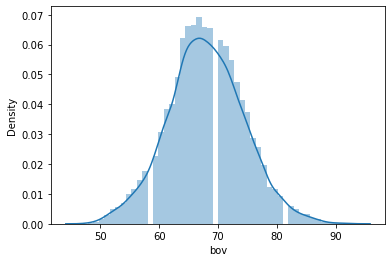

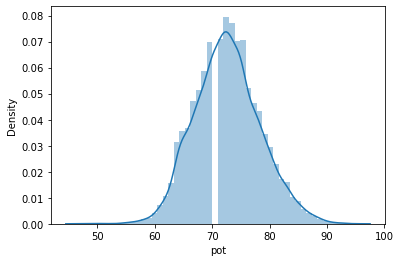

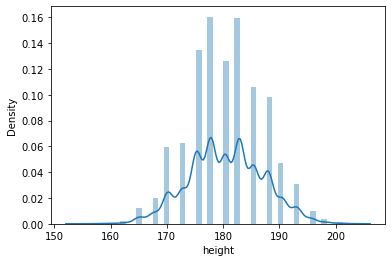

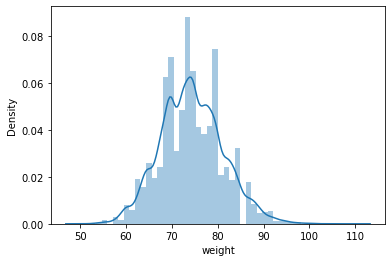

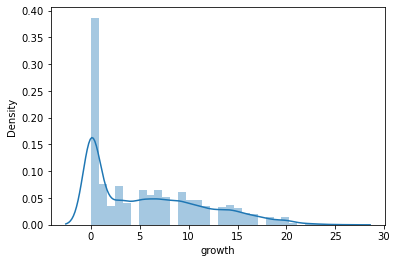

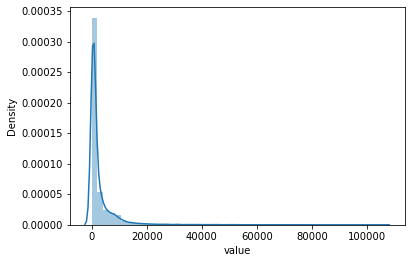

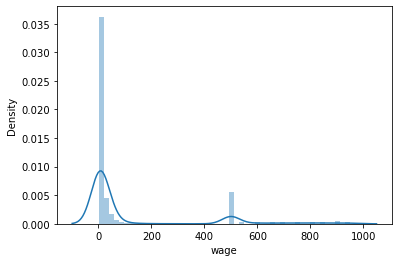

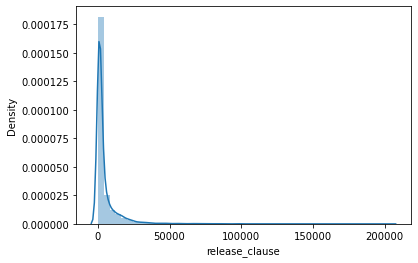

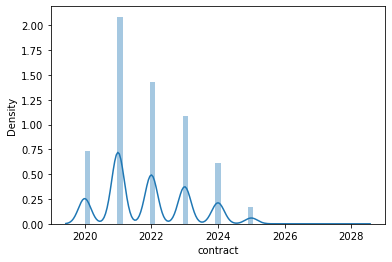

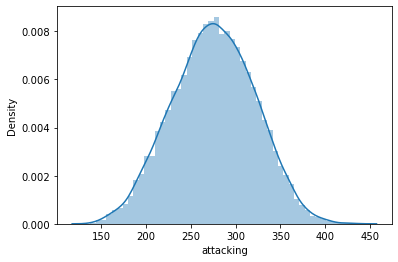

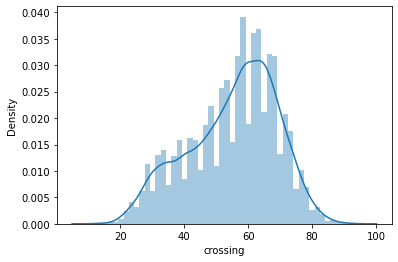

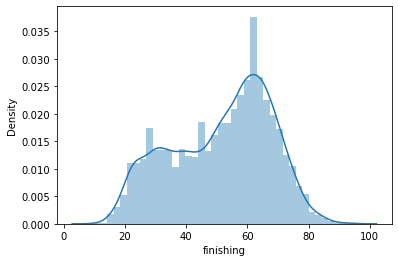

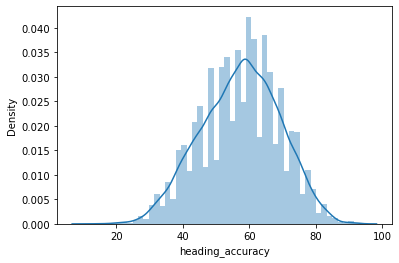

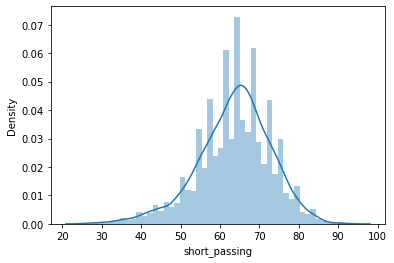

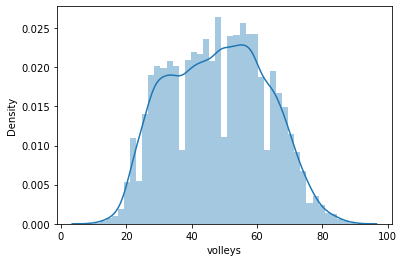

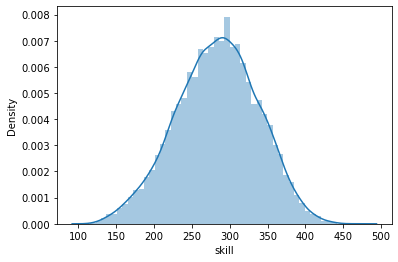

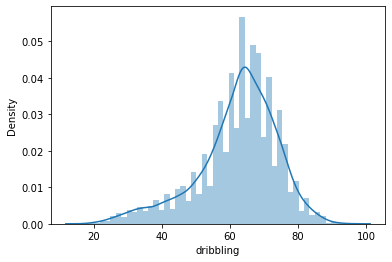

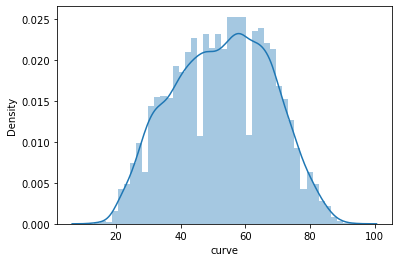

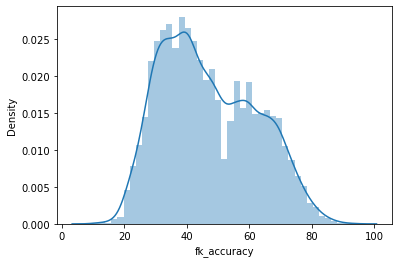

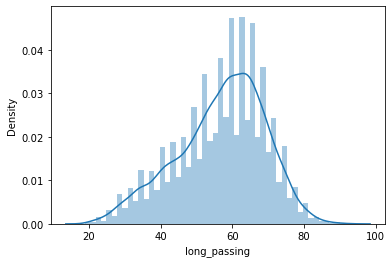

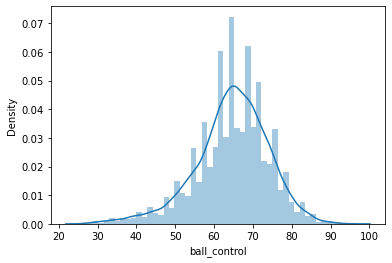

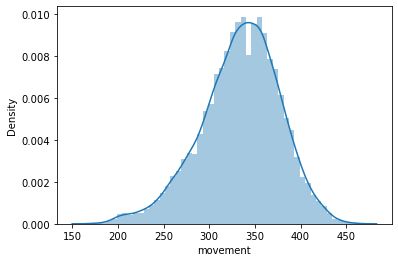

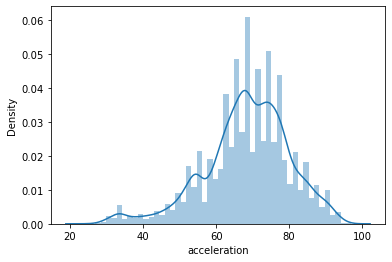

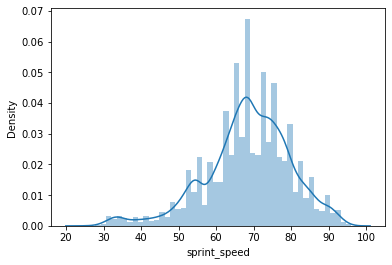

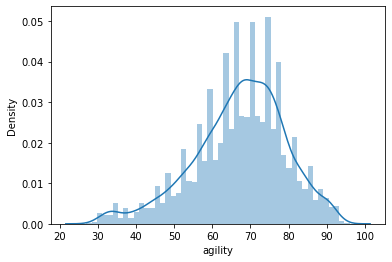

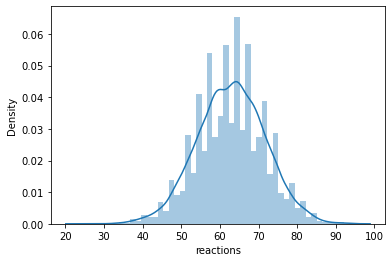

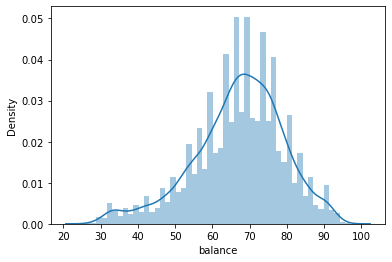

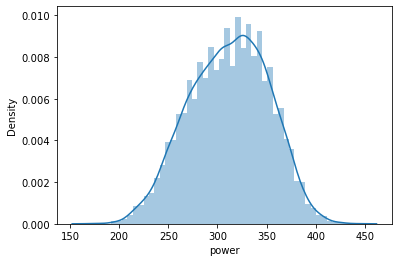

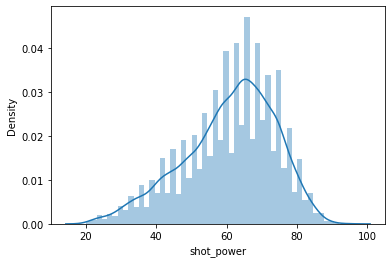

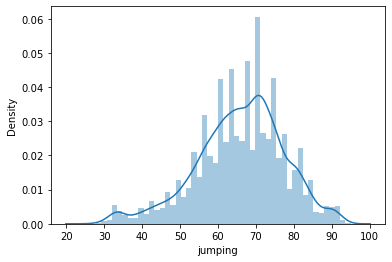

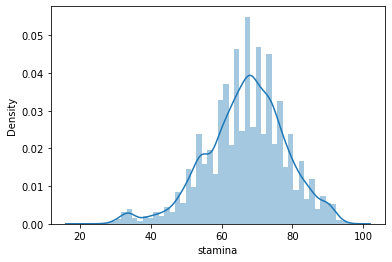

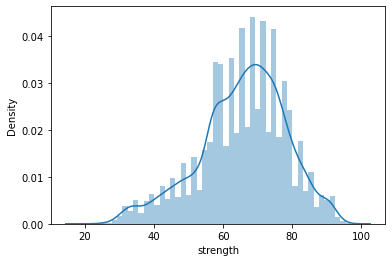

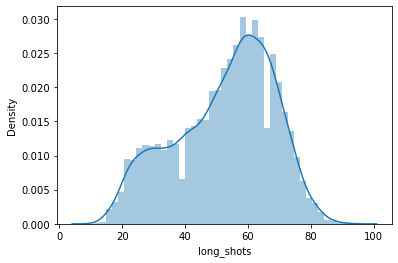

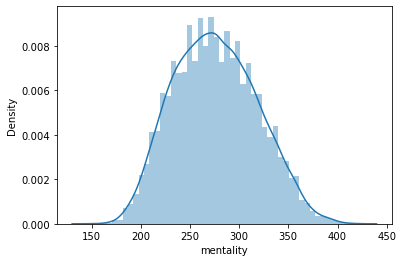

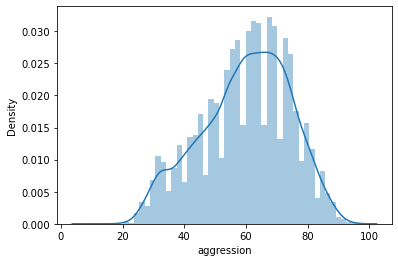

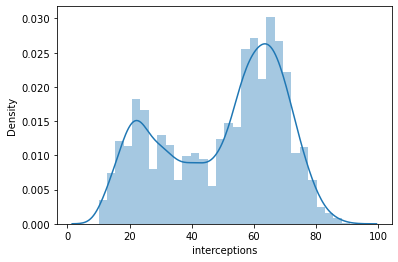

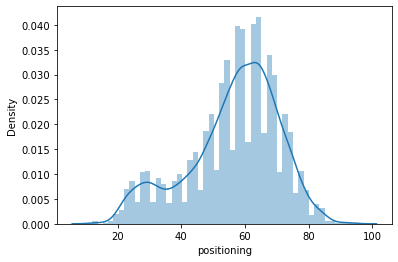

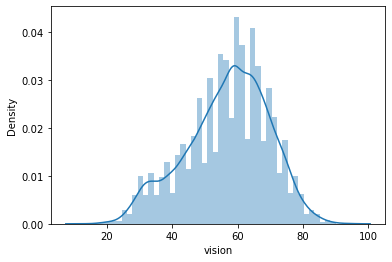

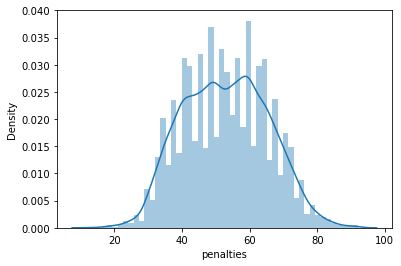

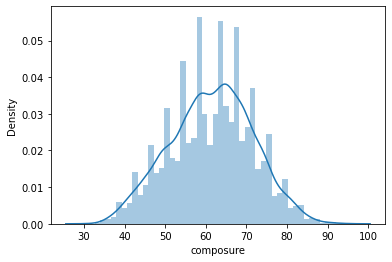

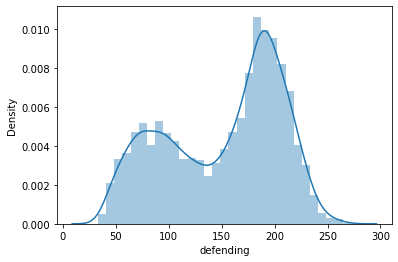

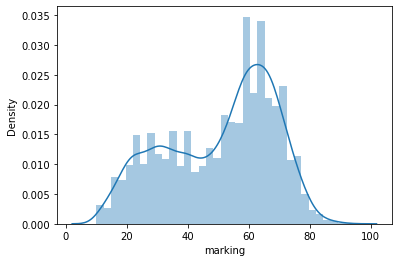

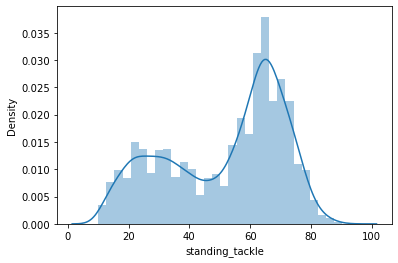

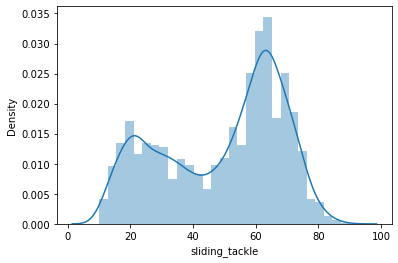

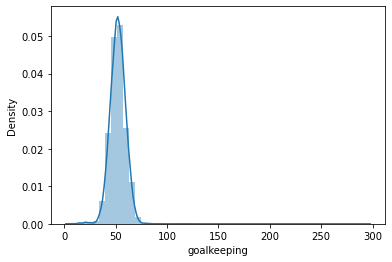

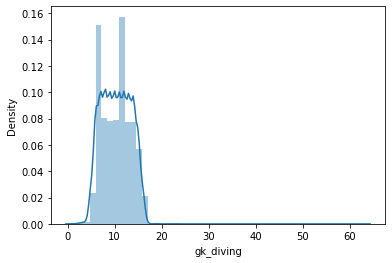

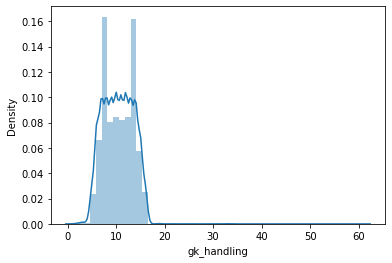

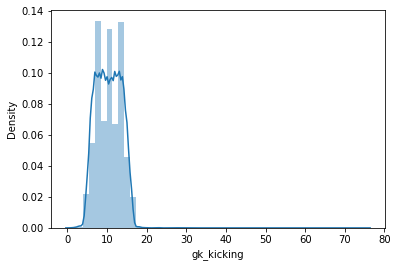

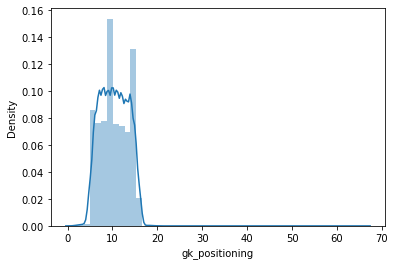

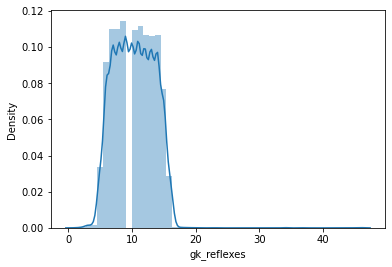

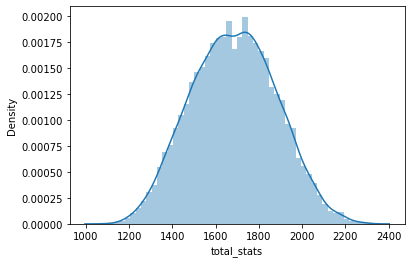

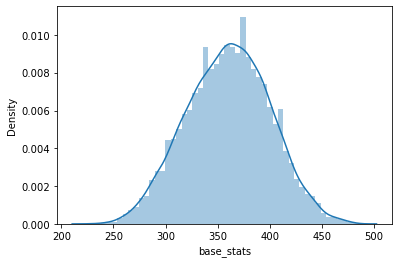

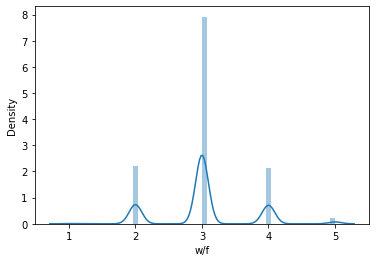

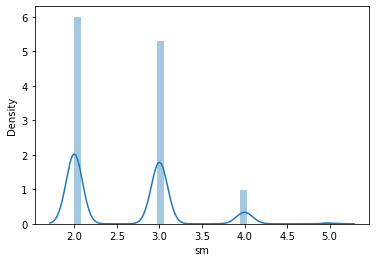

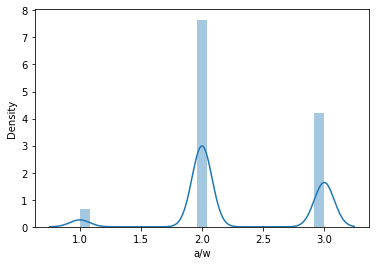

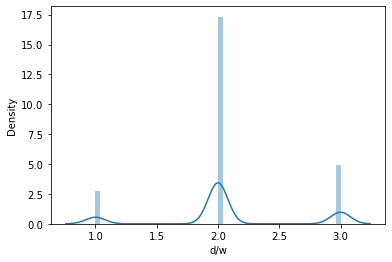

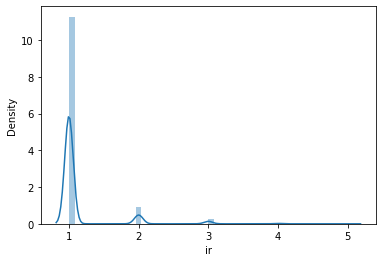

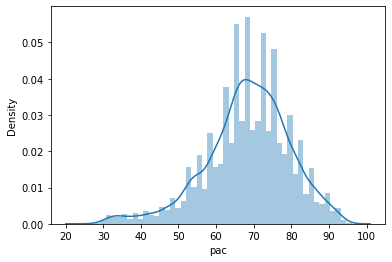

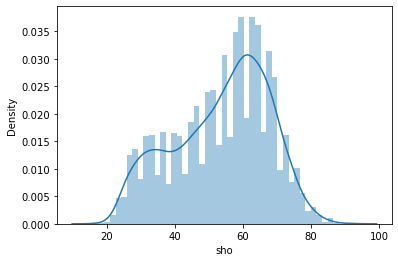

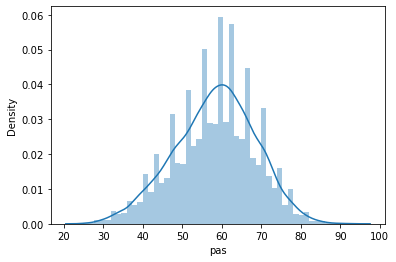

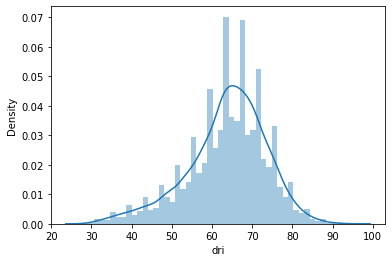

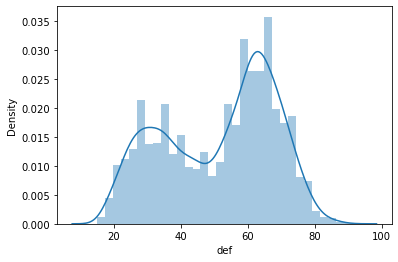

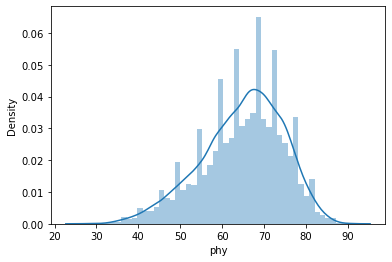

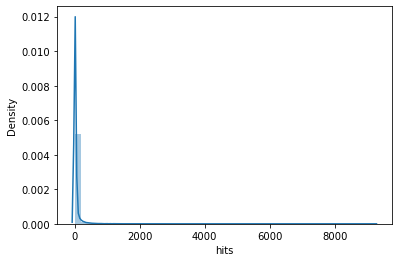

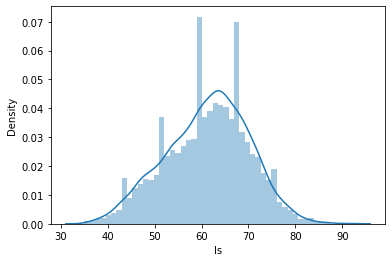

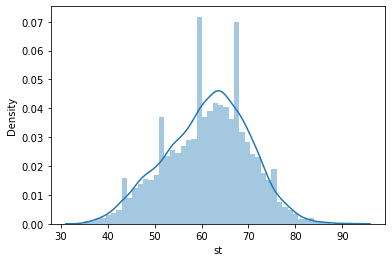

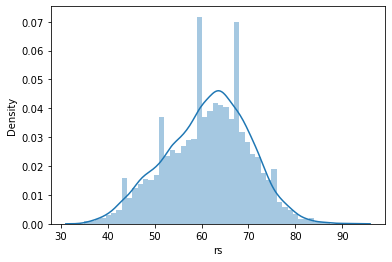

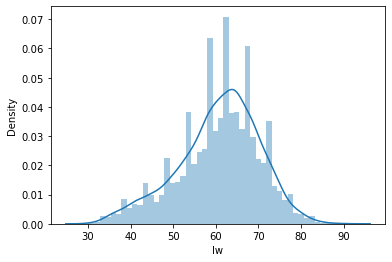

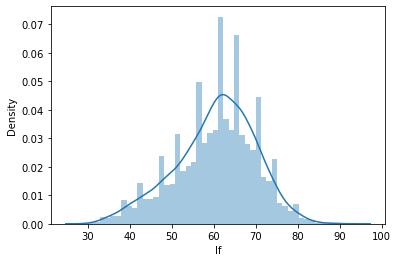

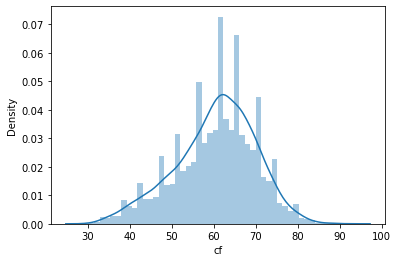

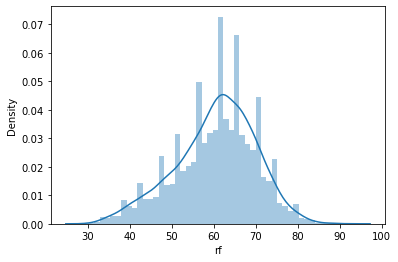

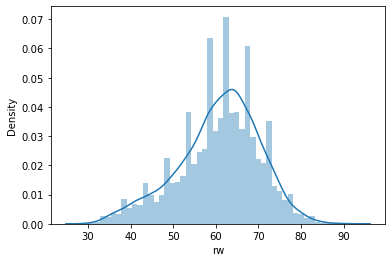

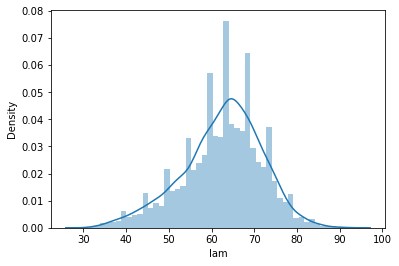

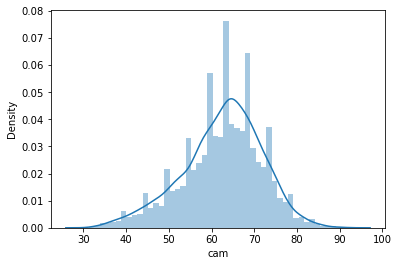

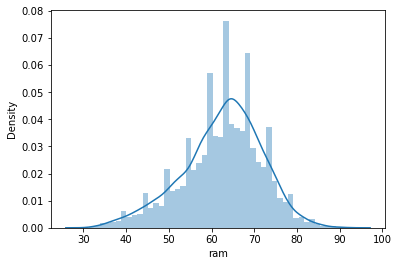

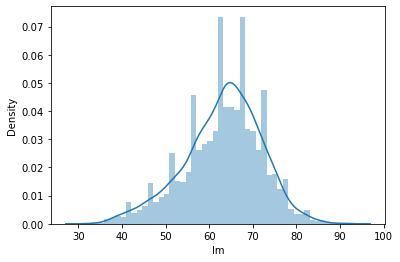

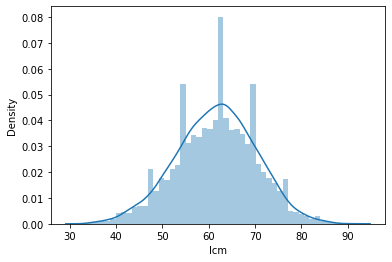

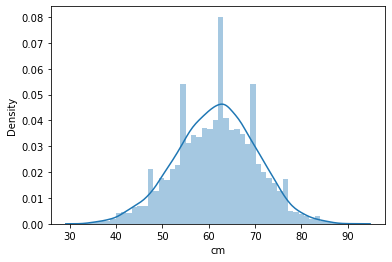

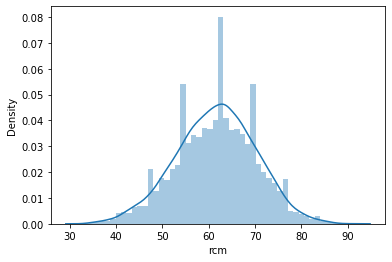

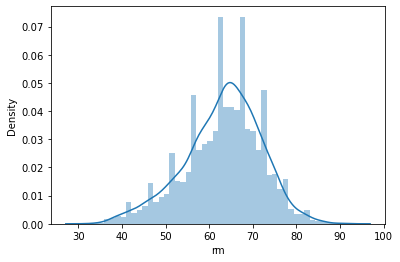

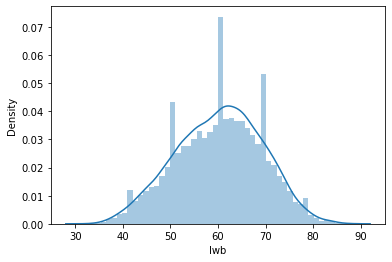

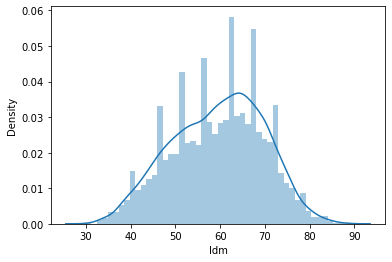

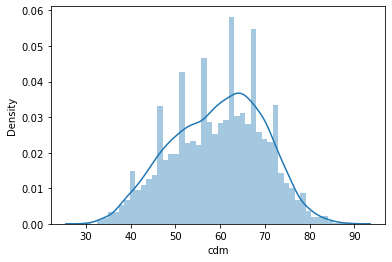

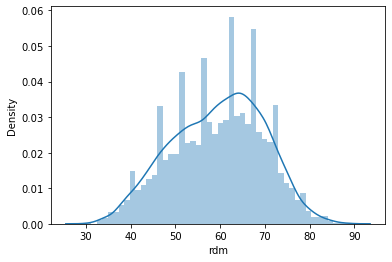

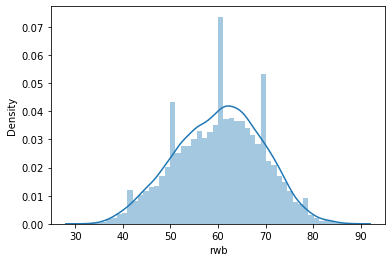

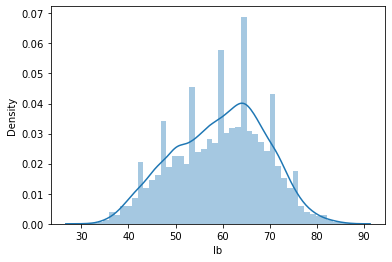

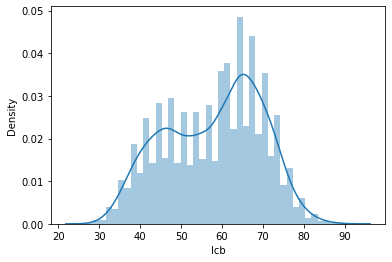

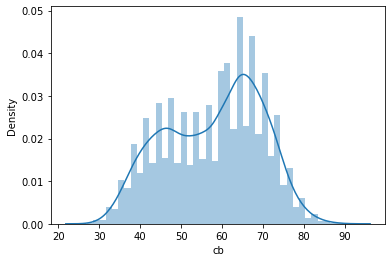

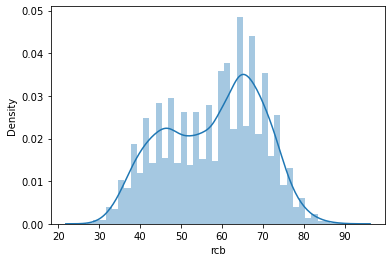

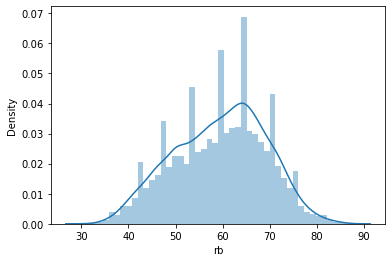

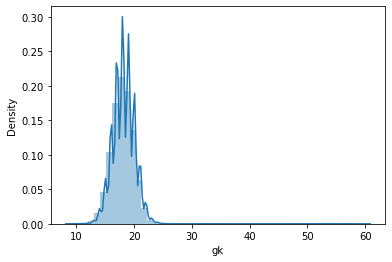

In [59]:
for column in df_f.select_dtypes(np.number).columns:
    sns.distplot(df_f[column])
    plt.show()

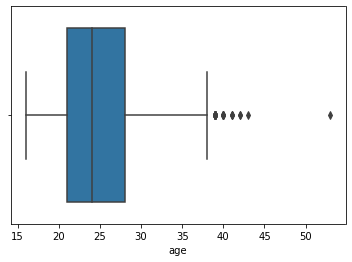

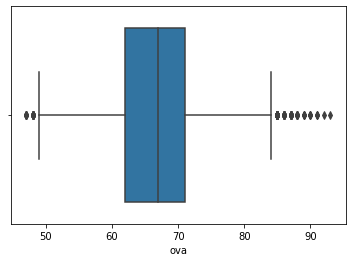

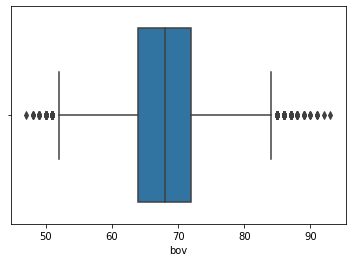

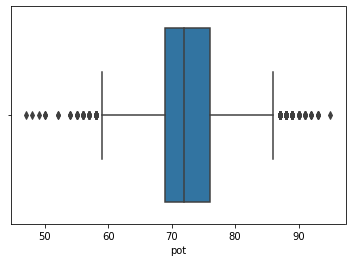

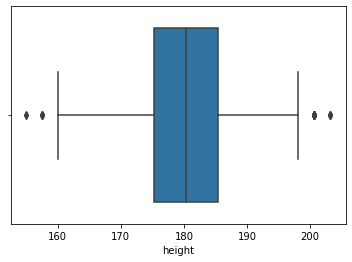

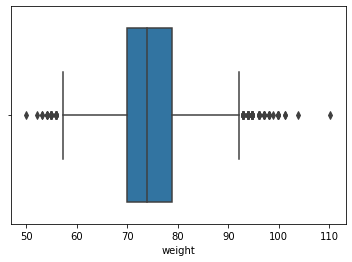

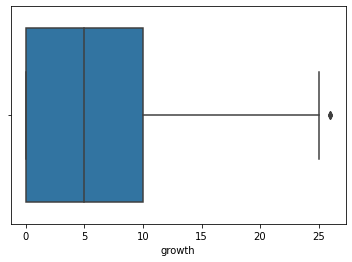

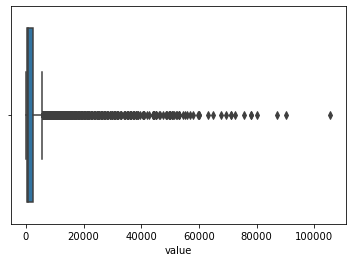

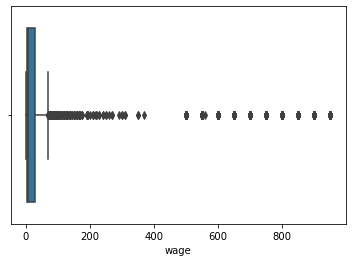

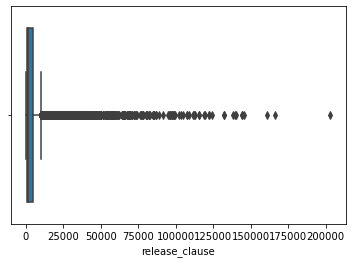

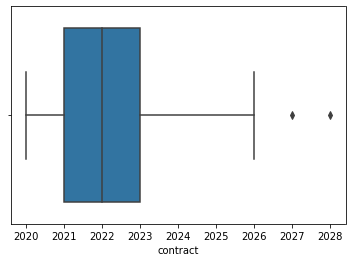

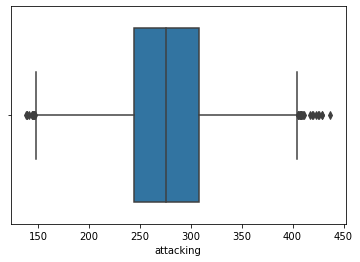

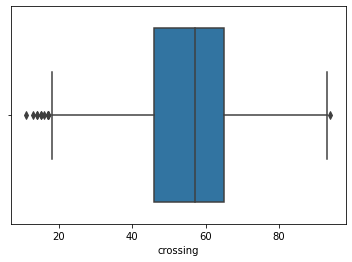

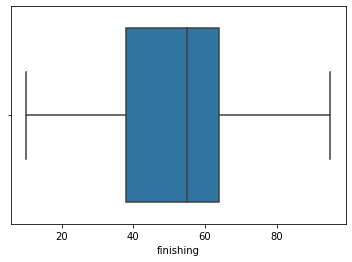

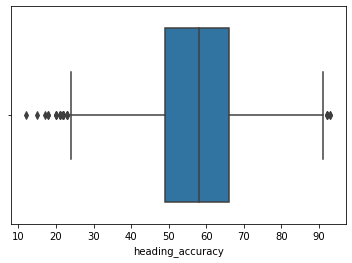

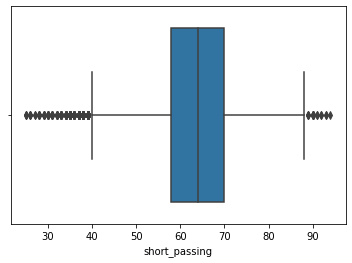

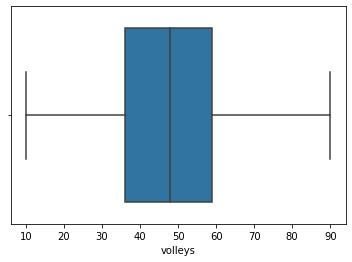

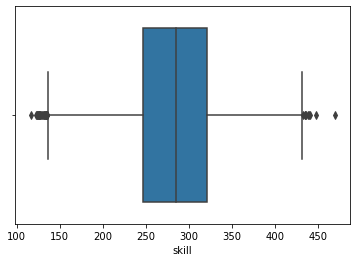

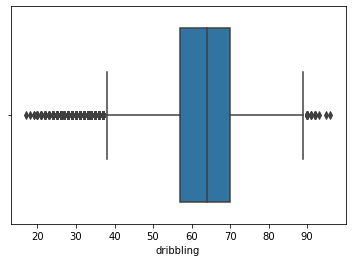

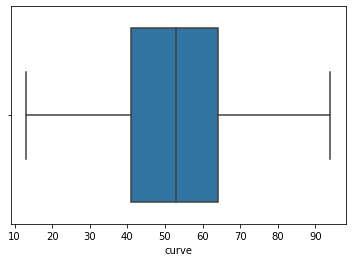

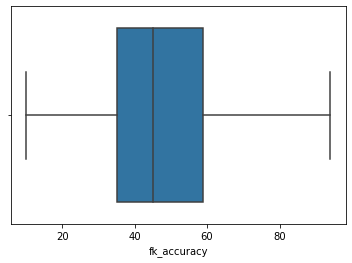

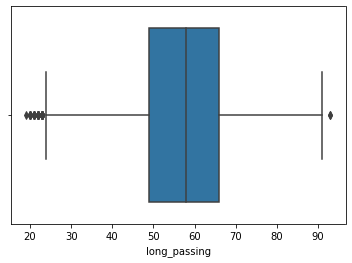

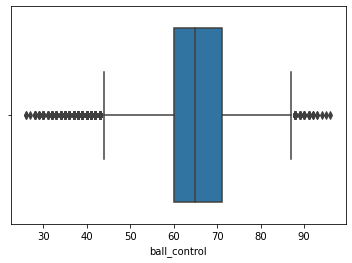

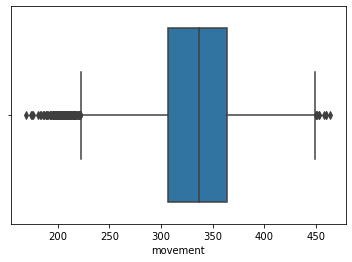

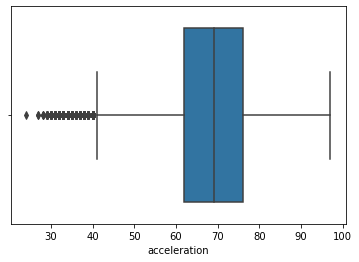

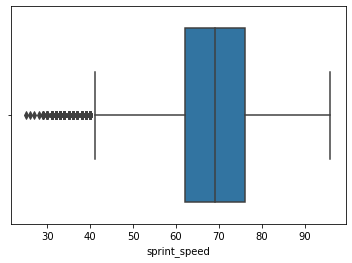

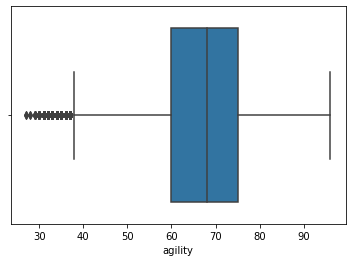

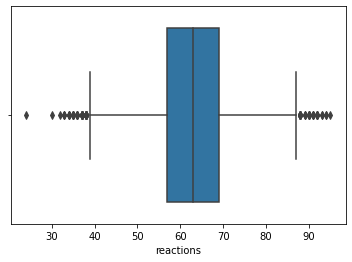

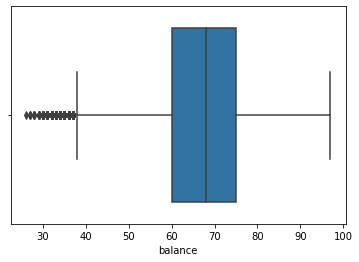

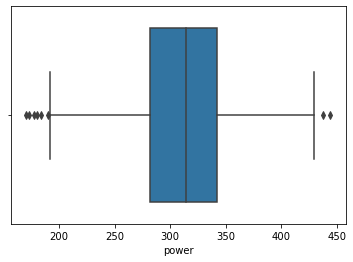

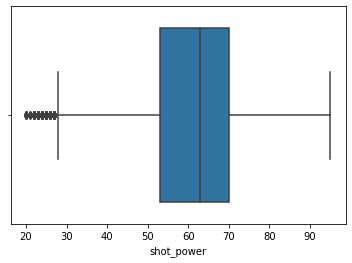

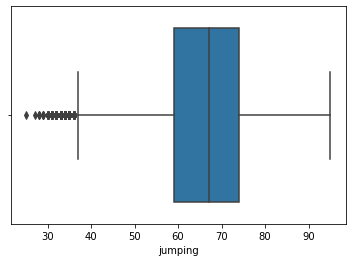

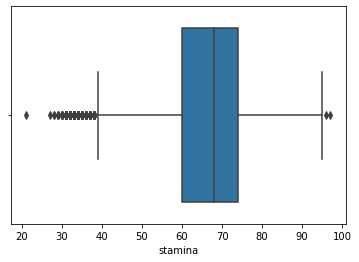

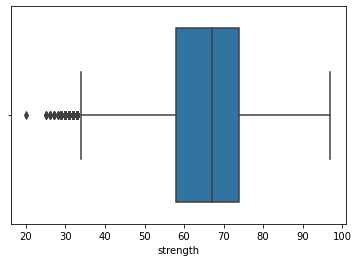

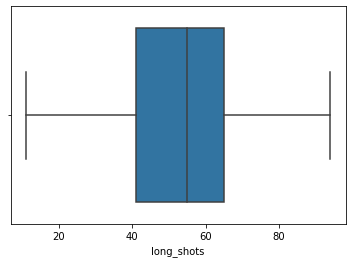

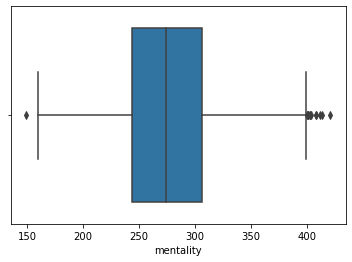

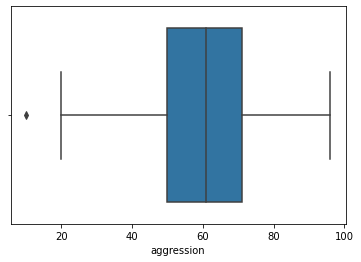

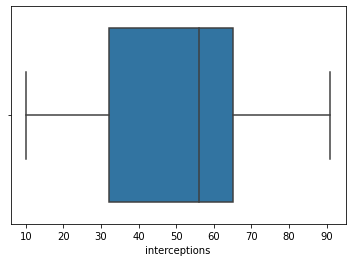

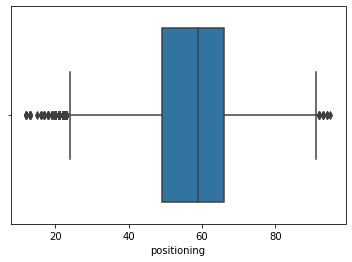

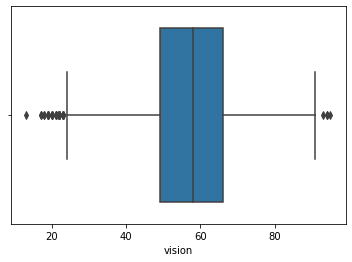

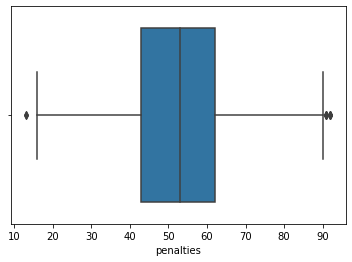

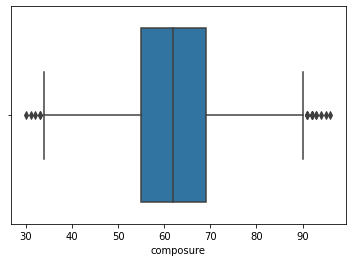

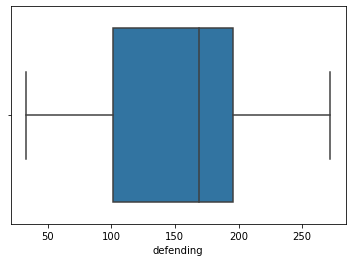

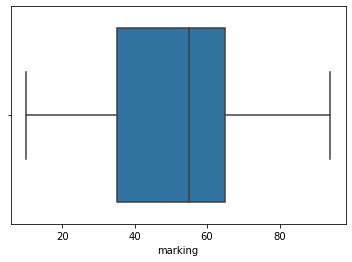

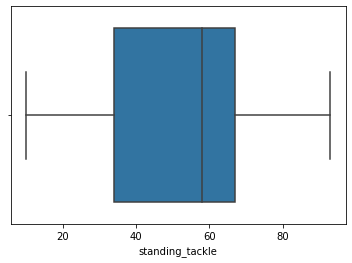

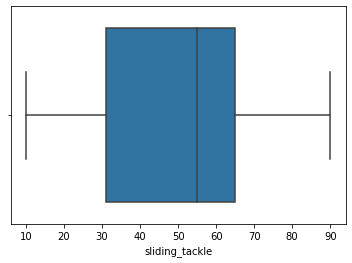

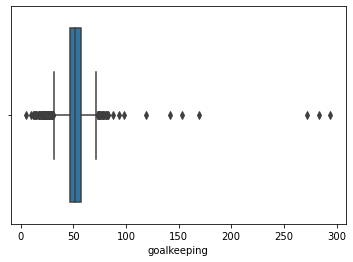

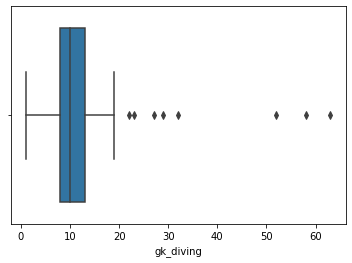

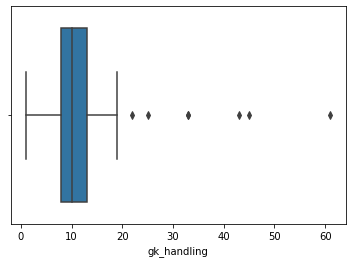

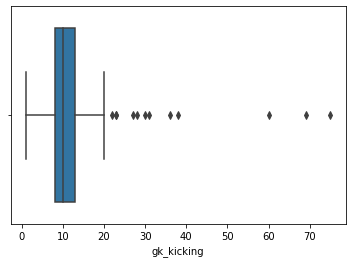

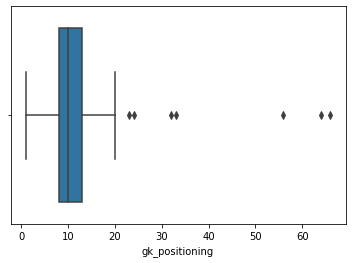

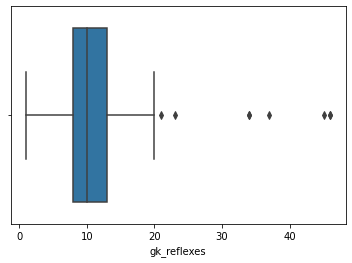

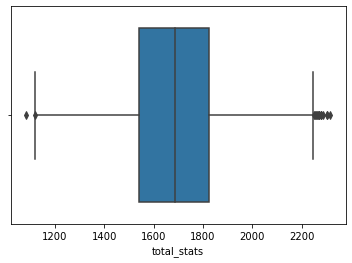

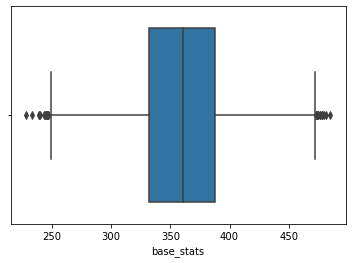

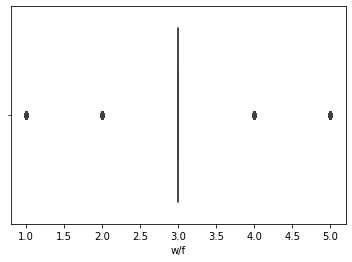

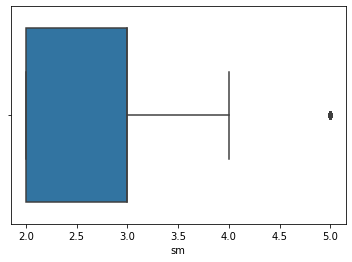

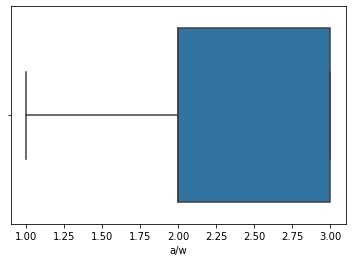

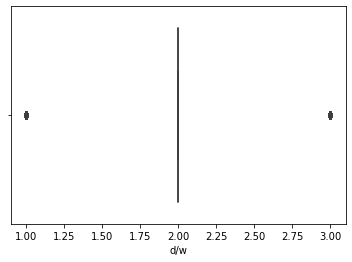

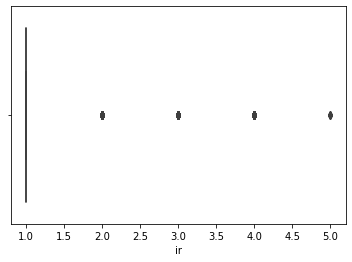

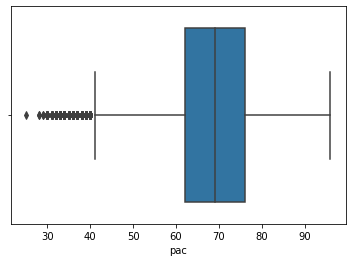

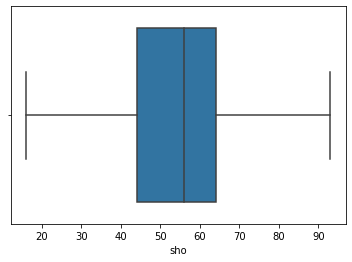

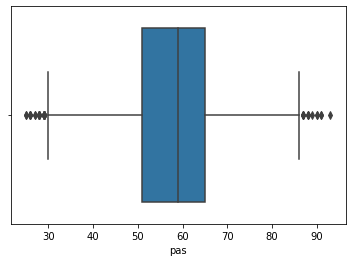

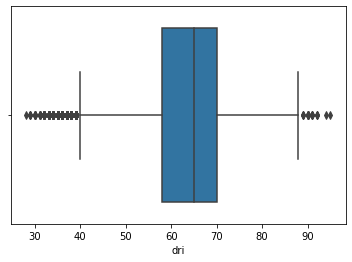

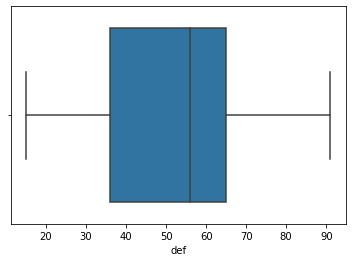

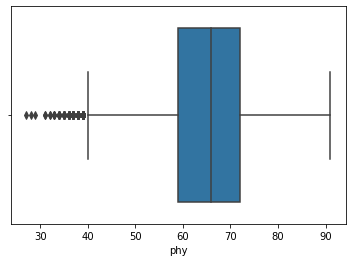

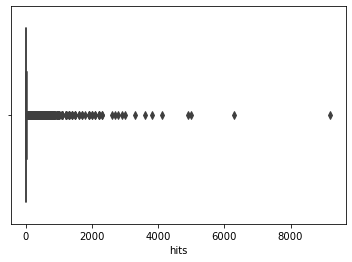

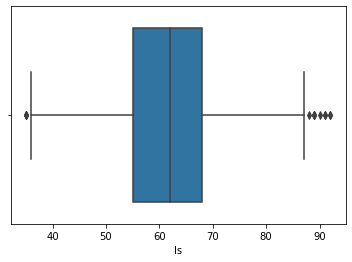

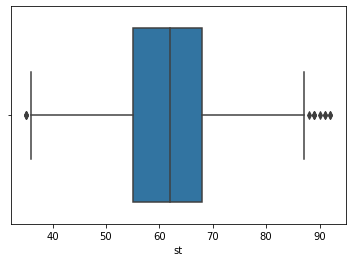

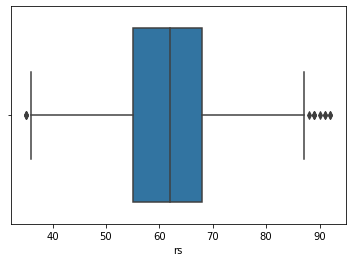

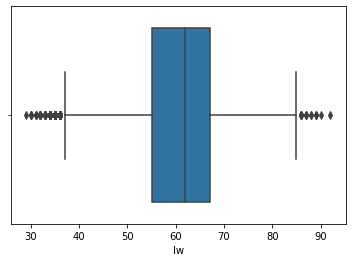

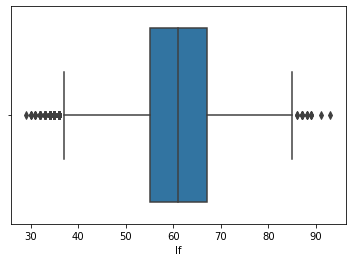

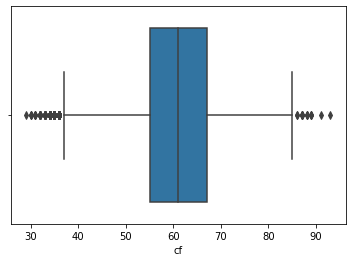

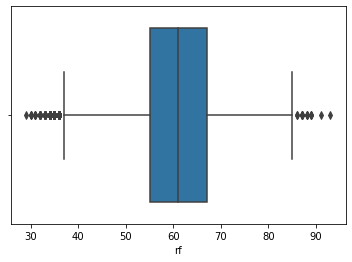

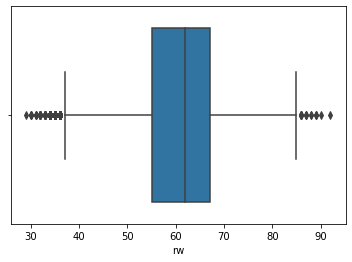

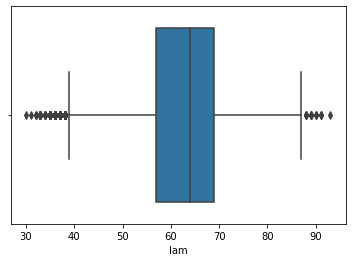

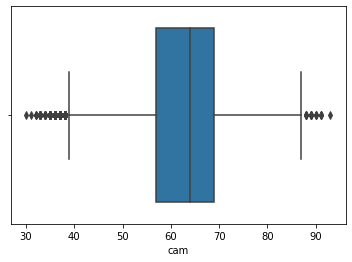

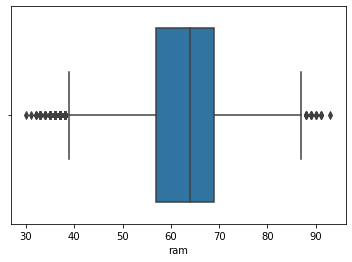

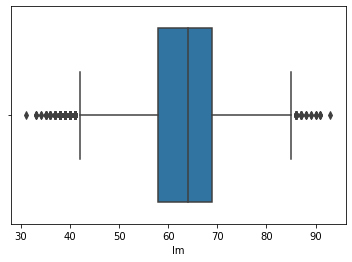

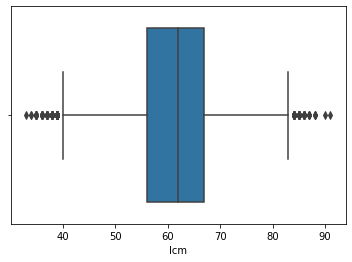

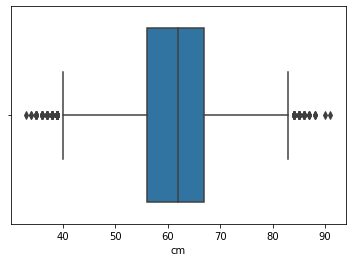

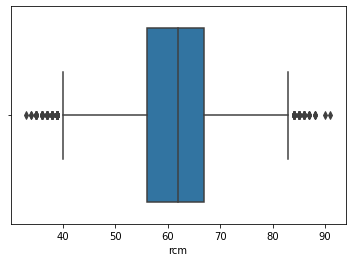

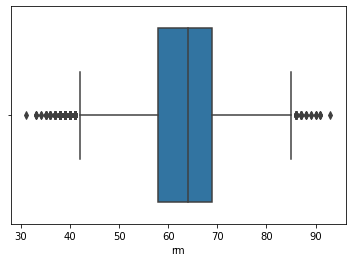

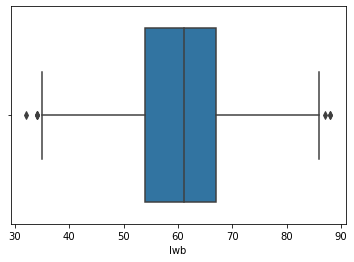

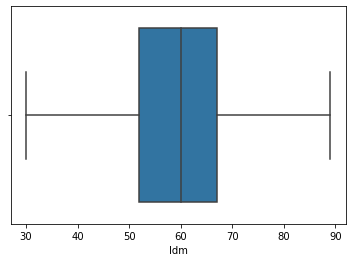

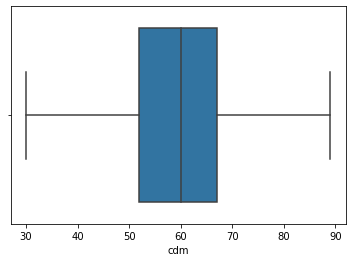

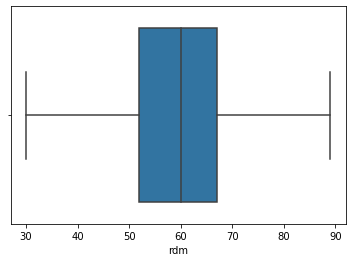

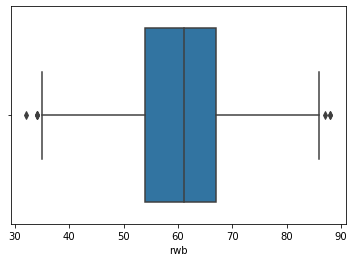

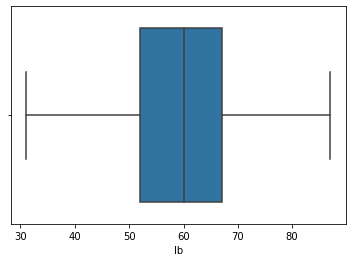

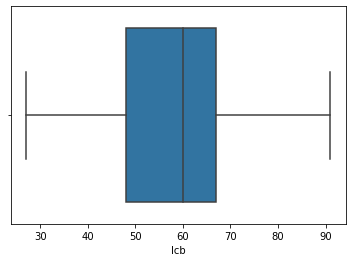

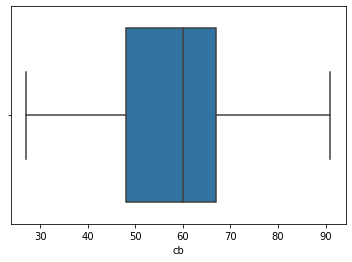

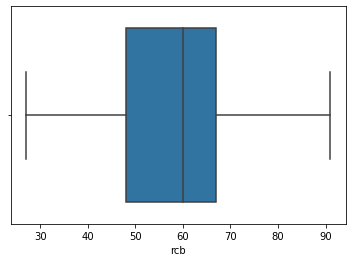

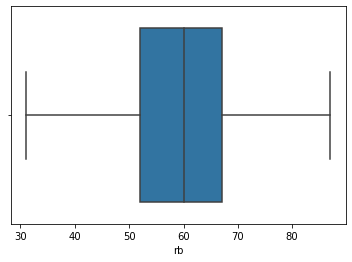

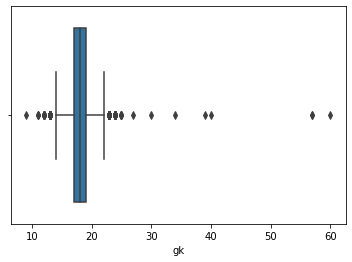

In [60]:
for column in df_f.select_dtypes(np.number).columns:
    sns.boxplot(df_f[column])
    plt.show()

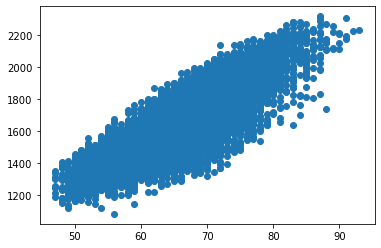

In [61]:
plt.scatter(df_f['ova'], df_f['total_stats'])
plt.show()

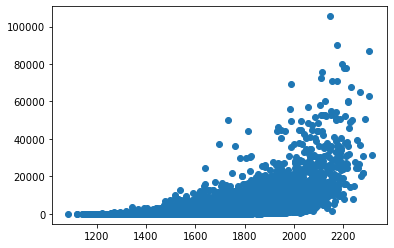

In [62]:
plt.scatter(df_f['total_stats'], df_f['value'])
plt.show()

In [63]:
df_a.bp.value_counts()

CB     3005
ST     2469
CAM    2076
GK     1464
RM     1330
CDM    1153
CM      926
LB      882
RB      857
LM      765
RW      280
RWB     240
LWB     234
LW      183
CF       69
Name: bp, dtype: int64

In [64]:
# The distributions seem more normal if there are no Goalkeepers. 

## 4. Personal Analysis

1. Which countries are the origins of high valued players?
2. Which clubs have more high valued players?
3. When is the football players' career-peak in terms of their values?

### 4-1. Which countries are the origins of high valued players?

In [65]:
# By counting nationalities, I notice that there are too many English player. 
# I guess that the data includes lower division of english league.

df_a.nationality.value_counts()

England                     1626
Germany                     1116
Spain                       1071
France                       936
Argentina                    747
Brazil                       727
Italy                        519
Netherlands                  449
Portugal                     340
United States                338
Mexico                       319
Uruguay                      304
Japan                        293
Colombia                     292
Poland                       279
Scotland                     263
Republic of Ireland          256
Belgium                      254
Norway                       252
Sweden                       250
Denmark                      250
Austria                      244
Turkey                       215
Switzerland                  205
Chile                        171
Paraguay                     168
Romania                      157
Korea Republic               153
Croatia                      136
Australia                    133
Venezuela 

In [173]:
df_a[df_a['nationality'] == 'England'].tail()

name  age  ova nationality                    club  bov  bp  \
id                                                                           
258904  J. Flanagan   17   55     England        Northampton Town   57  CB   
259031     L. Delap   17   61     England         Manchester City   63  ST   
259032     T. Jenks   18   54     England  Brighton & Hove Albion   59  CB   
259063    R. Fenlon   18   53     England      Accrington Stanley   59  RM   
259091   C. Barrett   18   56     England                 Burnley   56  RB   

       position                                       player_photo  \
id                                                                   
258904       CB  https://cdn.sofifa.com/players/258/904/20_120.png   
259031       ST  https://cdn.sofifa.com/players/259/031/20_120.png   
259032       CM  https://cdn.sofifa.com/players/259/032/20_120.png   
259063       CM  https://cdn.sofifa.com/players/259/063/20_120.png   
259091       RB  https://cdn.sofifa.com/players/259/091/20_120.png   

                                               club_logo  \
id                                                         
258904    https://cdn.sofifa.com/teams/1930/light_60.png   
259031      https://cdn.sofifa.com/teams/10/light_60.png   
259032    https://cdn.sofifa.com/teams/1808/light_60.png   
259063  https://cdn.sofifa.com/teams/110313/light_60.png   
259091    https://cdn.sofifa.com/teams/1796/light_60.png   

                                     flag_photo  pot  \
id                                                     
258904  https://cdn.sofifa.com/flags/gb-eng.png   69   
259031  https://cdn.sofifa.com/flags/gb-eng.png   82   
259032  https://cdn.sofifa.com/flags/gb-eng.png   71   
259063  https://cdn.sofifa.com/flags/gb-eng.png   70   
259091  https://cdn.sofifa.com/flags/gb-eng.png   67   

                           team_&_contract  height  weight   foot  growth  \
id                                                                          
258904        Northampton Town 2020 ~ 2021  182.88   69.85  Right      14   
259031         Manchester City 2020 ~ 2023  185.42   72.12  Right      21   
259032  Brighton & Hove Albion 2019 ~ 2023  190.50   79.83  Right      17   
259063      Accrington Stanley 2020 ~ 2022  172.72   63.96  Right      17   
259091                 Burnley 2020 ~ 2022  175.26   69.85  Right      11   

           joined loan_date_end  value   wage  release_clause  contract  \
id                                                                        
258904 2020-08-01           NaT  150.0  500.0           356.0      2021   
259031 2020-07-01           NaT  550.0    3.0          1600.0      2023   
259032 2019-07-01           NaT  140.0    3.0           354.0      2023   
259063 2020-09-24           NaT  120.0  500.0           285.0      2022   
259091 2020-08-20           NaT  130.0    2.0           273.0      2022   

        attacking  crossing  finishing  heading_accuracy  short_passing  \
id                                                                        
258904        187        31         24                54             49   
259031        273        42         62                59             50   
259032        244        48         44                55             56   
259063        222        48         44                37             58   
259091        218        55         34                53             42   

        volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
id                                                                    
258904     29.0    171         38   24.0           28            42   
259031     60.0    254         59   55.0           37            43   
259032     41.0    259         53   49.0           48            55   
259063     35.0    271         61   51.0           50            52   
259091     34.0    212         52   43.0           34            36   

        ball_control  movement  acceleration  sprint_speed  agility  \
id

In [67]:
# To get more precise overview of the countries, i will remove countries where total players are less than 150
# because the smaller the size is, the less reliable the data is.

df_n = df_a.loc[:,['nationality','value','bov','total_stats']].groupby('nationality').filter(lambda x: len(x) > 150)

In [68]:
# sum of the players' values by countries. Englad is not in top, meanwhile they have most players.

df_n.groupby('nationality').sum().sort_values('value', ascending=False).head()

value     bov  total_stats
nationality                                
Spain        4321475.0   75495      1800628
Brazil       3948155.0   52714      1266175
France       3449720.0   64421      1540207
England      2877028.0  105183      2546714
Germany      2758040.0   74920      1770127

In [69]:
# by looking at the mean of values, Brazil came to the top.

df_n.groupby('nationality').mean().sort_values('value', ascending=False).head()

value        bov  total_stats
nationality                                     
Brazil       5430.749656  72.508941  1741.643741
Portugal     4912.970588  71.317647  1720.394118
Belgium      4161.515748  69.311024  1651.330709
Spain        4034.990663  70.490196  1681.258637
France       3685.598291  68.825855  1645.520299

In [70]:
# I made the csv 'league_rate2.csv' which contains the name of the club and their league value.
# League values were extracted from this website: https://www.globalfootballrankings.com/

df_league = pd.read_csv('Data/league_rate2.csv', sep = ';')

In [71]:
df_aa = pd.merge(df_a, df_league, how='left', on ='club').fillna(0)
df_aa.rename({'rate': 'league_rate'}, axis=1, inplace=True)

In [72]:
# Because the data includes lower divisions, I want to remove those to get only 'top leagues' data.
# I filtered only leagues which has league value more than 40, which are;

# 1. England Premier League, 2. Spanish Primera Division, 3. German Bundesliga
# 4. Italy Serie A 5. French Ligue 1 6. Russian Premier Liga 7. Brasileiro Série A
# 8. Portuguese Liga 9. English League Championship 10. Dutch Eredivisie
# 11. Mexican Primera Division Torneo Clausura 12. Swiss Raiffeisen Super League
# 13. Austrian T-Mobile Bundesliga 14. Argentina Primera Division
# 15. Belgian Jupiler League 16. Chinese Super League
# 17. Turkish Turkcell Super Lig 18. Danish SAS-Ligaen

df_aa = df_aa[df_aa['league_rate'] >= 40]

In [73]:
df_n = df_aa.loc[:,['nationality','value','bov','total_stats']].groupby('nationality').filter(lambda x: len(x) > 150)
df_n.groupby('nationality').mean().sort_values('value', ascending=False).head(10)

value        bov  total_stats
nationality                                     
Brazil       6783.866822  73.366822  1750.126168
Spain        6482.513465  72.861759  1725.691203
Germany      5721.974026  70.927273  1642.771429
Portugal     5662.529880  72.027888  1724.549801
France       5556.868231  71.057762  1695.870036
Italy        4615.315615  70.980066  1648.388704
Belgium      4603.184080  69.477612  1647.268657
Argentina    4514.445983  70.842105  1694.049861
England      3455.195418  68.175202  1623.303235
Netherlands  3411.867008  68.654731  1635.695652

**Analysis**

Brazil is the country who sends most high valued players to the world, which is nothing surprising.
Spain also succeeded to have high valued players, despite the fact that their population size is not as large as countries like Germany. I could say that this is because Spain has better training environments for youths than Germany or France. 

The table above seems a little bit close to the study data where sorting top players' contributions by contries.
https://football-observatory.com/IMG/sites/mr/mr55/en/
Figure 4: football players’ production index, by association

### 4-2. Which clubs have more high valued players?

In [74]:
# Counting the number of the clubs presented in the dataframe

len(df_a['club'].unique())

845

In [75]:
# Sort by club

df_c = df_a.loc[:,['club','value','bov','total_stats']].groupby('club').filter(lambda x: len(x) > 15)

In [76]:
# Top 20 clubs

df_c.groupby('club').mean().sort_values('value', ascending=False).head(20)

value        bov  total_stats
club                                                     
FC Bayern München    27668.181818  82.000000  1904.045455
Real Madrid          24693.548387  80.612903  1900.516129
Liverpool            21848.974359  77.025641  1830.564103
Paris Saint-Germain  21042.500000  77.466667  1833.166667
Manchester City      20263.513514  75.783784  1818.594595
FC Barcelona         18757.894737  77.868421  1844.368421
Juventus             16529.054054  77.918919  1847.918919
Atlético Madrid      15999.305556  76.638889  1785.944444
Manchester United    14935.000000  76.578947  1832.184211
Borussia Dortmund    14665.714286  75.714286  1807.371429
Inter                14474.117647  77.294118  1823.823529
Chelsea              14215.930233  75.720930  1785.162791
Tottenham Hotspur    14049.390244  75.195122  1790.170732
Napoli               12661.714286  77.200000  1798.171429
Bayer 04 Leverkusen  10617.500000  76.366667  1787.933333
Arsenal              10510.125000  74.125000  1750.150000
RB Leipzig           10495.147059  73.558824  1704.617647
Sevilla FC           10223.571429  75.971429  1816.685714
SL Benfica           10080.000000  76.680000  1834.520000
Lazio                 9718.918919  74.945946  1794.837838

**Analysis**

This is also nothing suprising...
The higher the mean of values, the higher the mean of overall ability. 

#### Bonus.  Add league_value into the original dataframe

In [77]:
# using same csv that I used in 4-1

# I made the csv 'league_rate2.csv' which contains the name of the club and their league value.
# League values were extracted from this website: https://www.globalfootballrankings.com/

df_league= pd.read_csv('Data/league_rate2.csv', sep = ';')

In [78]:
df_league.head()

club   rate
0  1. FC Heidenheim 1846  35.23
1             1. FC Köln  70.49
2        1. FC Magdeburg   0.00
3         1. FC Nürnberg  35.23
4        1. FSV Mainz 05  70.49

In [79]:
# combine league_rate into the original dataframe 

df_a1 = pd.merge(df_a, df_league, how='left', on ='club').fillna(0)
df_a1.rename({'rate': 'league_rate'}, axis=1, inplace=True)

In [80]:
df_a1.club[df_a1['league_rate'] == 0].value_counts()

Sparta Praha                           40
Dynamo Kyiv                            34
U.N.A.M.                               33
Olympiacos CFP                         33
Stevenage                              33
SG Dynamo Dresden                      32
Salford City                           32
Legia Warszawa                         31
Dinamo Zagreb                          31
River Plate                            30
Colchester United                      30
Stade de Reims                         30
Racing Club                            30
Boca Juniors                           30
PFC CSKA Moscow                        30
Shakhtar Donetsk                       29
PAOK                                   29
Nacional de Montevideo                 29
SPAL                                   29
Forest Green Rovers                    29
1. FC Kaiserslautern                   29
AC Monza                               28
Bayern München II                      28
Colo-Colo                         

In [81]:
# filtering the data by the level of league

df_a2 = df_a1[df_a1['league_rate'] >= 40]

In [82]:
df_a2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7048 entries, 0 to 15971
Columns: 108 entries, name to league_rate
dtypes: bool(1), datetime64[ns](1), float64(17), int64(77), object(12)
memory usage: 5.8+ MB


In [83]:
# Hopefully this sorting would be helpful when I create the linear regression model

### 4-3.  When is the football players' career-peak in terms of their values?

In [84]:
# Checking distribution of number of players sorted by age

age_distribution = df_a[['age','name']].groupby('age').count().sort_values('age')
x1 = age_distribution.index
y1 = age_distribution.name

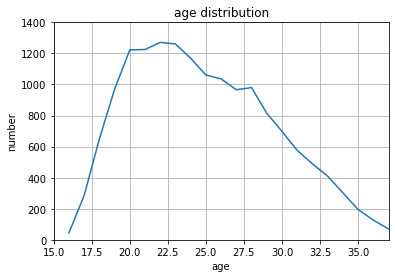

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.grid(True)
ax.set_xlim(left=15, right=37) 
ax.set_ylim(bottom=0, top=1400)
ax.set_xlabel('age')
ax.set_ylabel('number')
ax.set_title('age distribution')

ax.plot(x1, y1)
plt.show()

In [86]:
# the distribution of the mean of values by age

df_g = df_a.loc[:,['age','value']]
df_g1 = df_g.groupby('age').mean().sort_values('age')
df_g1

value
age             
16    252.954545
17    464.789474
18    510.539291
19    812.884417
20   1469.018806
21   1787.265306
22   2179.626279
23   2696.923077
24   3270.846878
25   3564.820924
26   3768.914093
27   3957.355072
28   4085.515306
29   3920.460123
30   3595.458453
31   3781.657986
32   3330.797546
33   2939.048780
34   2101.287129
35   1726.358974
36    827.125984
37    789.328571
38    821.379310
39    443.750000
40     72.692308
41     82.142857
42    493.000000
43     22.500000
47      3.000000
53      0.000000

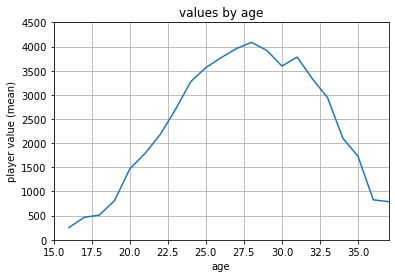

In [87]:
x2 = df_g1.index
y2 = df_g1['value'] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.grid(True)
ax.set_xlim(left=15, right=37) 
ax.set_ylim(bottom=0, top=4500)
ax.set_xlabel('age')
ax.set_ylabel('player value (mean)')
ax.set_title('values by age')

ax.plot(x2, y2)
plt.show()

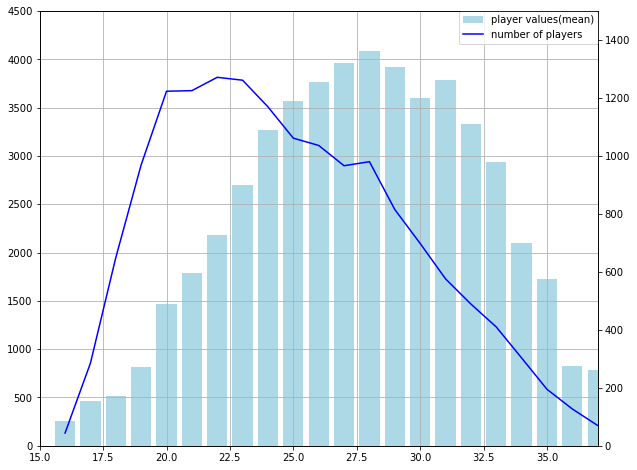

In [181]:
# combine two graphs into one

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1,1,figsize=(10,8))
ax2 = ax1.twinx()
ax1.bar(x2,y2,color='lightblue',label='player values(mean)')
ax2.plot(y1,linestyle='solid',color='b',label='number of players')
plt.xlim(15,37)
ax1.set_ylim(0,4500)
ax2.set_ylim(0,1500)
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1+handler2,label1+label2,borderaxespad=0)
ax1.grid(True)

plt.savefig('age_values.jpg', bbox_inches='tight')
fig.show()

**Analysis**

From this graph, I could say that the majority of the age group of professional football players are between 20 to 23. If players succeed to continue playing, their career peaks, in terms of their values, come around age of 28.

Thus, if you are young football player and want to become professional, you should keep playing until your early 30s, so that you could benefit most. Obviously, you need a lot of efforts to do so...

## 5. Creating Linear Regression Models

### 5-1. Transformation

#### 5-1-0 without transformation

**To see the improvement, I will start from model without transformation.**

transformation: none

dependent variable: 'ova'

In [89]:
df.shape

(17067, 107)

In [90]:
X = df[['ova']]
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.4004261124780204, 2253.5575777373683, 4420.029900395022)

In [91]:
# No box-cox, basic cleaning only
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.4004261124780204, 2253.5575777373683, 4420.029900395022)

#### 5-1-1. Box-cox transfomation to 'value'

box-cox transformation: 'value'

dependent variable: 'ova'

In [92]:
df1 = df.copy()

In [93]:
def boxcox_transform(df):
    _ci = {column: None for column in cols}
    for column in cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [94]:
cols = ['value']

In [95]:
# I call df_t as transfomed dataframe

df_t, _ci = boxcox_transform(df1)

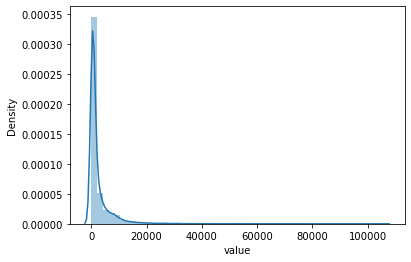

In [96]:
sns.distplot(df['value'])
plt.show()

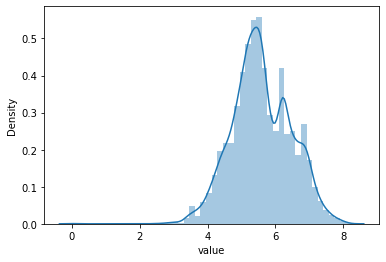

In [97]:
sns.distplot(df_t['value'])
plt.show()

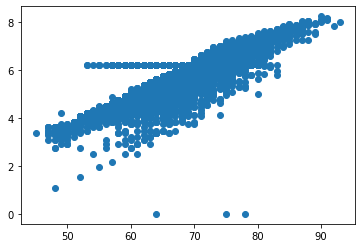

In [98]:
plt.scatter(df_t['ova'], df_t['value'])
plt.show()

In [99]:
df_t.shape

(17067, 107)

In [100]:
X = df_t[['ova']]
y = df_t['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8583523034162067, 0.21852978146016203, 0.32797874599026855)

In [101]:
# box-cox 'value', basic cleaning only
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8583523034162067, 0.21852978146016203, 0.32797874599026855)

### 5-2. removing some players

#### 5-2-1. all active players

**filter out the retired players**

dataframe: only active players

transformation: none

dependent variable: 'ova'

In [102]:
df_a1 = df_t[df_t['active'] == True]

In [103]:
df_a1.shape

(15933, 107)

In [104]:
X = df_a1[['ova']]
y = df_a1['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8834911994028122, 0.19938234961494045, 0.29155778624658907)

In [105]:
# Box-cox:'value', cleaning:'active',
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8834911994028122, 0.19938234961494045, 0.29155778624658907)

#### 5-2-2. top club active players

**Filter out the clubs in the lower divition league**

dataframe: active, top clubs only

box-cox transformation: 'value'

dependent variable: 'ova'

In [106]:
df_a1 = pd.merge(df_a1, df_league, how='left', on ='club').fillna(0)
df_a1.rename({'rate': 'league_rate'}, axis=1, inplace=True)

In [107]:
df_60 = df_a1[df_a1['league_rate'] >= 60] # Selecting top 5 leagues (Premier, Liga, Bundesliga, Serie A, Ligue1) 
df_50 = df_a1[df_a1['league_rate'] >= 50] # Selecting top 8 leagues (top5 + Russia, Brazil, Portugal) 
df_40 = df_a1[df_a1['league_rate'] >= 40] # Selecting top 18 leagues (including english second division league)
df_20 = df_a1[df_a1['league_rate'] >= 20] # Selecting top 31 leagues (including various second division leagues)

In [174]:
df_60.shape, df_50.shape, df_40.shape, df_20.shape

((3274, 108), (3848, 108), (7048, 108), (10179, 108))

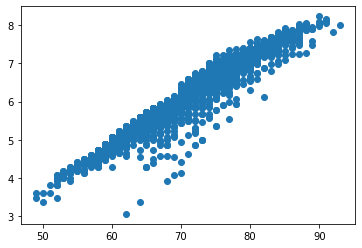

In [109]:
# The correlation looks better

plt.scatter(df_60['ova'], df_60['value'])
plt.show()

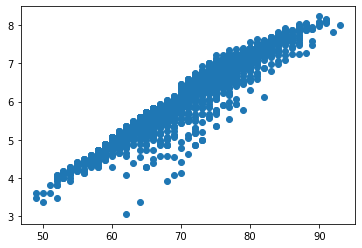

In [110]:
plt.scatter(df_50['ova'], df_50['value'])
plt.show()

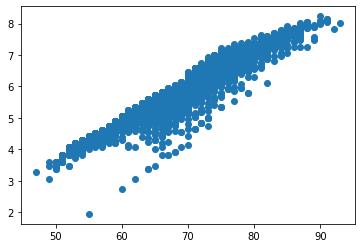

In [111]:
plt.scatter(df_40['ova'], df_40['value'])
plt.show()

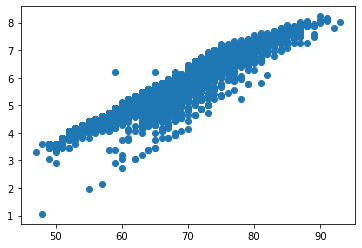

In [112]:
plt.scatter(df_20['ova'], df_20['value'])
plt.show()

In [113]:
X = df_20[['ova']]
y = df_20['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8990566773311371, 0.19372448687333887, 0.27618592942122006)

In [114]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 20)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8990566773311371, 0.19372448687333887, 0.27618592942122006)

In [115]:
X = df_40[['ova']]
y = df_40['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9061348385732834, 0.190715786239586, 0.27134582443734045)

In [116]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 40)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9061348385732834, 0.190715786239586, 0.27134582443734045)

In [117]:
X = df_50[['ova']]
y = df_50['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.906087389979006, 0.180232325532418, 0.2636533042564942)

In [118]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 50)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.906087389979006, 0.180232325532418, 0.2636533042564942)

In [119]:
X = df_60[['ova']]
y = df_60['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9291954022953139, 0.17337887640618294, 0.23846100737704876)

In [120]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 60)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9291954022953139, 0.17337887640618294, 0.23846100737704876)

#### 5-2-3. top club active outfield player

**Filter out the goalkeepers.**
This is because the goalkeepers have different evaluation method from the outfield players.

dataframe: active, top league, outfield player

box-cox transformation: 'value'

dependent variable: 'ova'

In [121]:
df_20f = df_20[df_20['bp'] != 'GK']
df_20f.shape

(9222, 108)

In [122]:
X = df_20f[['ova']]
y = df_20f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9111181864671014, 0.1805521209981038, 0.25377896295864466)

In [123]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 20), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.9111181864671014, 0.1805521209981038, 0.25377896295864466)

In [124]:
df_40f = df_40[df_40['bp'] != 'GK']
df_40f.shape

(6356, 108)

In [125]:
X = df_40f[['ova']]
y = df_40f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9302323809110304, 0.1714506323876103, 0.23713754887468985)

In [126]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 40), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9302323809110304, 0.1714506323876103, 0.23713754887468985)

In [127]:
df_50f = df_50[df_50['bp'] != 'GK']
df_50f.shape

(3456, 108)

In [128]:
X = df_50f[['ova']]
y = df_50f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9357621022990587, 0.15746490696545468, 0.21731925003629307)

In [129]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 50), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9357621022990587, 0.15746490696545468, 0.21731925003629307)

In [130]:
df_60f = df_60[df_60['bp'] != 'GK']
df_60f.shape

(2933, 108)

In [131]:
X = df_60f[['ova']]
y = df_60f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9364430794443148, 0.15948465163661507, 0.22490145983728746)

In [132]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 60), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9364430794443148, 0.15948465163661507, 0.22490145983728746)

### 5-3. Change dependent variables

#### 5-3-1. 'ova' and 'age'
dataframe: active, top clubs, outfield player

box-cox transformation: 'value'

dependent variable: 'ova', 'age'

In [133]:
X = df_20[['ova', 'age']]
y = df_20['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9649982512460127, 0.11766568117863423, 0.1626326066215007)

In [134]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 20), outfielder and goalkeeper
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9649982512460127, 0.11766568117863423, 0.1626326066215007)

In [135]:
X = df_20f[['ova', 'age']]
y = df_20f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9658427903521885, 0.10649305678752571, 0.15732232547636238)

In [136]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 20), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9658427903521885, 0.10649305678752571, 0.15732232547636238)

In [137]:
X = df_40[['ova', 'age']]
y = df_40['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9657406082387802, 0.12181325194887602, 0.16393087286955665)

In [138]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 40), outfielder and goalkeeper
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9657406082387802, 0.12181325194887602, 0.16393087286955665)

In [139]:
X = df_40f[['ova', 'age']]
y = df_40f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9728968031441606, 0.11123203891244825, 0.14780313135311124)

In [140]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 40), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9728968031441606, 0.11123203891244825, 0.14780313135311124)

In [141]:
X = df_50[['ova', 'age']]
y = df_50['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9612591435470418, 0.12431184478107533, 0.16933856375521786)

In [142]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 50), outfielder and goalkeeper
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9612591435470418, 0.12431184478107533, 0.16933856375521786)

In [143]:
X = df_50f[['ova', 'age']]
y = df_50f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9689904161569691, 0.12024148902746316, 0.1509908071979783)

In [144]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 50), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9689904161569691, 0.12024148902746316, 0.1509908071979783)

In [145]:
X = df_60[['ova', 'age']]
y = df_60['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9675740212083584, 0.12524162164135233, 0.16137386163075085)

In [146]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 60), outfielder and goalkeeper
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.9675740212083584, 0.12524162164135233, 0.16137386163075085)

In [147]:
X = df_60f[['ova', 'age']]
y = df_60f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9712204871126539, 0.11073949259908011, 0.1513395960966014)

In [148]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 60), outfielder
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.9712204871126539, 0.11073949259908011, 0.1513395960966014)

**Best model so far is as following.**

dataframe: active, top clubs (who belong to top 18 leagues), outfield player

box-cox transformation: 'value'

dependent variable: 'ova', 'age'

In [149]:
X = df_40f[['ova', 'age']]
y = df_40f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9728968031441606, 0.11123203891244825, 0.14780313135311124)

In [150]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.155e+05
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:46:47   Log-Likelihood:                 3414.8
No. Observations:                6356   AIC:                            -6824.
Df Residuals:                    6353   BIC:                            -6803.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3005      0.018   -130.607      0.0

#### 5-3-2. 'ova', 'age' and 'sm'
dataframe: active, top clubs, outfield player

box-cox transformation: 'value'

dependent variable: 'ova', 'age', 'sm'

In [151]:
X = df_40f[['ova', 'age', 'sm']]
y = df_40f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9735619395530519, 0.10960012951838966, 0.14597825604632222)

In [152]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 7.819e+04
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:46:47   Log-Likelihood:                 3461.6
No. Observations:                6356   AIC:                            -6915.
Df Residuals:                    6352   BIC:                            -6888.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2903      0.018   -130.747      0.0

**Other variables**

I tried other variables as well, but did not work well. For example, I initially assumed that 'ir'(international reputation) would be good variable, but when I put it, the coef was negative (which I suppose should be positive).

#### 5-3-3. add fifa best 11  --> did not work well
dataframe: active, top clubs, outfield player

box-cox transformation: 'value'

dependent variable: 'ova', 'age', 'sm'

In [153]:
df_best11= pd.read_csv('Data/best11.csv', delimiter=';')

In [154]:
df_40b = pd.merge(df_40f, df_best11, how='left', on ='name').fillna(0)

In [155]:
X = df_40b[['ova', 'age', 'sm', 'best11']]
y = df_40b['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9751096586820128, 0.10770540528640486, 0.14164094036447356)

In [156]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 6.048e+04
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:46:47   Log-Likelihood:                 3557.6
No. Observations:                6356   AIC:                            -7105.
Df Residuals:                    6351   BIC:                            -7071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3217      0.017   -133.419      0.0

In [157]:
# did not work well...

#### 5-3-4. remove outlier from 'value' --> did not work well
dataframe: active, top clubs, outfield player

box-cox transformation: 'value'

dependent variable: 'ova', 'age', 'sm'

In [158]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [159]:
df_40o = df_40f.copy()
df_40o = remove_outliers(df_40o, threshold=1.5, in_columns=['value'])

In [160]:
X = df_40o[['ova', 'age', 'sm']]
y = df_40o['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9729806602668473, 0.10950929219952771, 0.14588510584905537)

In [161]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 7.808e+04
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:46:47   Log-Likelihood:                 3461.5
No. Observations:                6355   AIC:                            -6915.
Df Residuals:                    6351   BIC:                            -6888.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2913      0.018   -130.699      0.0

In [162]:
# did not work well neither...

### 5-4. Overall results of the models

| top_league | no trans | box-cox'value' | only active | no gk | 'ova','age' | 'ova','age','sm' | best11 | remove outliers
| ---        | ---      | ---            |   ---       |  ---  |  ---        | ---              | ---    | --- 
|  all       |  0.400   |  0.858         |  0.883      |  -    |  -          |  -               |  -     |  -  
|  top31     |  -       |  -             |  0.899      | 0.911 | 0.965       |  -               |  -     |  -  
|  top18     |  -       |  -             |  0.906      | 0.930 | **0.972**   |  **0.973**       | 0.975  | 0.972
|  top8      |  -       |  -             |  0.906      | 0.935 | 0.968       |  -               |  -     |  - 
|  top5      |  -       |  -             |  0.929      | 0.936 | 0.971       |  -               |  -     |  - 

*Notice*

The best11 has the highest r-squared value, however the coeffecient of best11 was negative, which supposed to be positive. So, I would not take it as the best model.

## 6. Analysing Linear Regression Models

In [163]:
# Box-cox:'value', cleaning:'active', top_league(rate higher than 40), outfielder,
# target variables: 'ova', 'age', 'sm'

X = df_40f[['ova', 'age', 'sm']]
y = df_40f['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9735619395530519, 0.10960012951838966, 0.14597825604632222)

In [166]:
model.coef_

array([ 0.13538158, -0.04795874,  0.02457087])

In [167]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [168]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(6696.540722106396, 25564.54471257783)

In [169]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true           pred          resid
11398     130.0     153.274872      23.274872
11652    1200.0    1660.968398     460.968398
1235     3500.0    2406.052401    1093.947599
6416      475.0     463.460861      11.539139
2291    26000.0   32378.068854    6378.068854
5750     9000.0    8442.192655     557.807345
12582     525.0     475.174661      49.825339
14065    4600.0    4141.604260     458.395740
6860     6500.0    4135.243292    2364.756708
12194    4400.0    3477.309155     922.690845
9012     2600.0    2605.739305       5.739305
15681     675.0     792.175262     117.175262
3318     3300.0    2746.664929     553.335071
9895     8000.0    6663.845124    1336.154876
8749      180.0     197.429636      17.429636
3840     1000.0    1275.872859     275.872859
4164    13500.0   15389.748940    1889.748940
9493      525.0     479.667585      45.332415
15848     180.0     211.086618      31.086618
3293     4100.0    3297.796176     802.203824
12318     900.0    1075.369456     175.369456
1040      210.0     312.026258     102.026258
120       450.0     848.242698     398.242698
650      1900.0    1790.296599     109.703401
3888     4600.0    3121.982825    1478.017175
15570    1000.0    1035.297160      35.297160
15605     275.0     368.206779      93.206779
5713    21500.0   24981.268510    3481.268510
8125      500.0     552.710353      52.710353
11906     750.0     873.310243     123.310243
431      1900.0    2775.664290     875.664290
1229     6000.0    4180.041466    1819.958534
1269     7500.0    6470.528561    1029.471439
12534     300.0     289.087319      10.912681
873     31500.0   61093.543622   29593.543622
8732      925.0    1061.332407     136.332407
293      1900.0    2004.306885     104.306885
9105     1100.0    1199.645648      99.645648
72        900.0    1007.101203     107.101203
11080    2000.0    1768.751796     231.248204
2518    50000.0   91742.164843   41742.164843
5054     4400.0    3428.487973     971.512027
579      3100.0    2225.835736     874.164264
7869    10500.0   13908.733531    3408.733531
2235      230.0     266.445662      36.445662
10451    1500.0    1936.043144     436.043144
10830     450.0     351.028679      98.971321
14870     725.0     893.418202     168.418202
12831    1400.0    1622.125559     222.125559
11891     500.0     458.332844      41.667156
13595     475.0     442.890173      32.109827
12293    1700.0    2176.043963     476.043963
10644     575.0     621.675970      46.675970
15081      90.0      79.044044      10.955956
2614     1600.0    1578.991400      21.008600
369     67500.0  355335.389777  287835.389777
14774     350.0     403.370603      53.370603
5720     9000.0    6566.430988    2433.569012
4978     3700.0    2854.252092     845.747908
9166      375.0     363.710074      11.289926
654      2000.0    1744.939269     255.060731
936     13000.0   14887.537305    1887.537305
3093     6500.0    4419.905156    2080.094844
1747     3100.0    2256.680252     843.319748
13136     180.0     206.741152      26.741152
7341     2400.0    2146.368707     253.631293
792      8500.0   12510.134931    4010.134931
10740    3400.0    2935.208309     464.791691
9943     1100.0    1523.793231     423.793231
5531      650.0     752.411130     102.411130
12496     600.0     559.726178      40.273822
14867     875.0    1008.519280     133.519280
3630     7500.0    7645.966226     145.966226
10263   36000.0   65381.632046   29381.632046
3122     3300.0    2854.252092     445.747908
12926    1400.0    1359.214187      40.785813
15282     650.0     645.851488       4.148512
15029     400.0     509.971100     109.971100
5385     1400.0    1727.227447     327.227447
603      6500.0    4725.477673    1774.522327
2344      875.0     859.304219      15.695781
2904     3900.0    3206.184279     693.815721
1550     7000.0    4927.009580    2072.990420
4229     2000.0    1768.751796     231.248204
11138     200.0     238.631049      38.631049
258      2000.0    1953.172621      46.827379
6954     

In [170]:
results.describe()

true           pred          resid
count    1272.000000    1272.000000    1272.000000
mean     4899.233491    6702.489680    2474.990753
std      8864.905879   24681.967993   17563.180988
min        40.000000      31.331031       0.436511
25%       625.000000     674.437781      44.544171
50%      1600.000000    1715.586810     240.054094
75%      5500.000000    4496.065198     845.747908
max    105500.000000  550213.544283  444713.544283

In [171]:
results.sort_values(['resid'], ascending=False)

true           pred          resid
8355   105500.0  550213.544283  444713.544283
369     67500.0  355335.389777  287835.389777
4332    78000.0  246484.243757  168484.243757
8239    60000.0  200758.112050  140758.112050
3341    72500.0  187508.592659  115008.592659
2947    59500.0  165857.995820  106357.995820
3257    71000.0  160706.653939   89706.653939
305     53000.0  122899.359498   69899.359498
9211    49500.0  119085.195044   69585.195044
5497    51000.0  112955.494423   61955.494423
4836    56000.0  114960.613553   58960.613553
2518    50000.0   91742.164843   41742.164843
8374    44000.0   84447.923889   40447.923889
8293    44500.0   81931.766087   37431.766087
1825    38000.0   74042.737211   36042.737211
8092    41000.0   74356.359264   33356.359264
166     15500.0   48142.008941   32642.008941
3179    46500.0   78969.056647   32469.056647
9201    35000.0   65381.632046   30381.632046
873     31500.0   61093.543622   29593.543622
10263   36000.0   65381.632046   29381.632046
7892    42500.0   70766.870777   28266.870777
8285    35500.0   59556.897382   24056.897382
288     21000.0   44562.167396   23562.167396
6135    33000.0   54027.118576   21027.118576
1824    37000.0   57580.036261   20580.036261
2363    38000.0   57445.003642   19445.003642
223     34500.0   53929.694218   19429.694218
4415    36500.0   55773.525502   19273.525502
1140    37000.0   54843.377215   17843.377215
10986   26500.0   44189.332714   17689.332714
1667    30500.0   47541.425079   17041.425079
5566    32000.0   48340.494778   16340.494778
781     19500.0   34925.574308   15425.574308
7908    12000.0   26270.351113   14270.351113
1941    30500.0   44110.642857   13610.642857
2847    22000.0   35501.287344   13501.287344
4427    35000.0   48340.494778   13340.494778
1357    28500.0   41263.854842   12763.854842
853     15000.0   27746.176243   12746.176243
4507    30000.0   42650.809688   12650.809688
1102    35500.0   47541.425079   12041.425079
8057    14500.0   26270.351113   11770.351113
7858    20500.0   31911.675834   11411.675834
2323    25500.0   36535.133661   11035.133661
5579    23000.0   33449.689349   10449.689349
1393    24500.0   34846.187714   10346.187714
3721    31000.0   40753.984841    9753.984841
6047    26500.0   36004.899795    9504.899795
7907    10000.0   19472.273762    9472.273762
1494    21500.0   30892.282112    9392.282112
3813    25500.0   33863.004547    8363.004547
6629    21000.0   29122.015991    8122.015991
5324    28000.0   36087.094357    8087.094357
5085    23000.0   30517.371147    7517.371147
7366    17500.0   24682.068874    7182.068874
2908    16500.0   23527.688848    7027.688848
7126    27500.0   34420.115232    6920.115232
4155    27000.0   33863.004547    6863.004547
2558    25500.0   32304.820167    6804.820167
9910    19500.0   26270.351113    6770.351113
1362    17000.0   23527.688848    6527.688848
7418    20500.0   27020.891902    6520.891902
6385    24000.0   30517.371147    6517.371147
3340    19000.0   25441.141344    6441.141344
2291    26000.0   32378.068854    6378.068854
105      5500.0   10532.088501    5032.088501
1161    16500.0   21507.956179    5007.956179
4193    26500.0   31397.583442    4897.583442
6247    19000.0   23620.434940    4620.434940
2196    14500.0   18574.627103    4074.627103
4658    12500.0   16543.435677    4043.435677
792      8500.0   12510.134931    4010.134931
9761    15500.0   19168.042103    3668.042103
12501   14500.0   18100.957127    3600.957127
5713    21500.0   24981.268510    3481.268510
7869    10500.0   13908.733531    3408.733531
3423    24000.0   27350.315016    3350.315016
1097     7000.0   10256.051327    3256.051327
10048   10000.0    6762.796223    3237.203777
3755    22500.0   25441.141344    2941.141344
8776    10500.0    7560.887973    2939.112027
3883    14500.0   17270.234723    2770.234723
9570    12500.0   15178.067947    2678.067947
12633   12000.0    9327.094200    2672.905800
13503    9000.0    6386.190446    2613.809554
8537    1

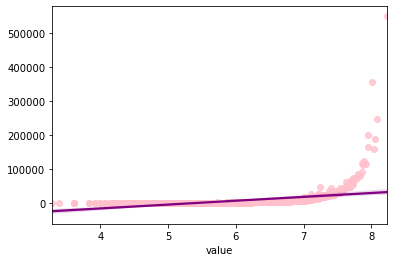

In [179]:
# copied the code from Kathi's file.

sns.regplot(y_test, predictions, scatter_kws={'color' : 'pink'}, line_kws={'color' : 'purple'})

plt.savefig('regplot_1.jpg',transparent=True, bbox_inches='tight')
plt.show()

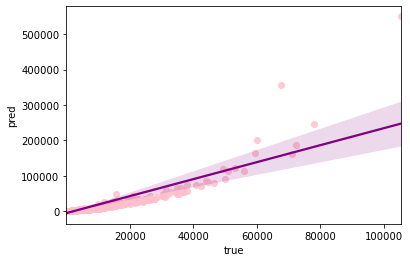

In [180]:
sns.regplot(results['true'], results['pred'], scatter_kws={'color' : 'pink'}, line_kws={'color' : 'purple'})

plt.savefig('regplot_2.jpg', bbox_inches='tight')
plt.show()

## 7. Conclusion

### Linear Regression Model
As taking the following steps, the R-squared of the model reached to 0.9735.

[**Cleaning**]
- Filter out retired players
- Filter out goalkeepers
- Filter out players who belongs to lower division

The number of rows decreased to 7048. (In the beginning it was 17125)

[**Transformation**]
- Box-cox transformation to 'value' variable

[**Variables**]
- set dependent variable as 'ova', 'age' and 'sm'
- but not necessary to have 'sm' because it doesn't make a big difference.

### Things to consider 

I am little skeptical about my model, because the r-squared is too high...

This model is mostly dependent on 'overall rating' which I do not know how this value was created. If overall rating was made from abilities as well as market value, this model would not work.